In [1]:
% matplotlib inline

from AtmoBuilder import AtmoBuilder
import copy
import numpy as np

In [2]:
ab = AtmoBuilder()

Found 16 MODTRAN files:
Pachon_MODTRAN.10.7sc
Pachon_MODTRAN.11.7sc
Pachon_MODTRAN.12.7sc
Pachon_MODTRAN.13.7sc
Pachon_MODTRAN.14.7sc
Pachon_MODTRAN.15.7sc
Pachon_MODTRAN.16.7sc
Pachon_MODTRAN.17.7sc
Pachon_MODTRAN.18.7sc
Pachon_MODTRAN.19.7sc
Pachon_MODTRAN.20.7sc
Pachon_MODTRAN.21.7sc
Pachon_MODTRAN.22.7sc
Pachon_MODTRAN.23.7sc
Pachon_MODTRAN.24.7sc
Pachon_MODTRAN.25.7sc
MODTRAN files have been read.

Read filter data from LSST software stack.
Filters: ['u', 'g', 'r', 'i', 'z', 'y4']
Read hardware data from LSST software stack.


In [3]:
ab.readAll()

# Read 988 MS stars from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/kurucz/
# Read 849 white dwarfs from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/wDs/
# Read 74 mlt stars from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/mlt/
# Generated 2520 galaxies at redshifts between 0.000000 and 3.000000
# Generated 76 quasars at redshifts between 0.000000 and 7.500000
# Generated 39 sn's at redshifts between 0.000000 and 1.200000 on days ['0', '20', '40']


In [4]:
global_max = 1.2
global_min = 0.8
airmass = 1.2

def componentLimitPlot(comp, minp=global_min, maxp=global_max, plotTrans=True, plotTransComponents=True, plotThroughput=True, plotDphi=True, plotDmags=True):
    prange, pnum = ab._componentCheck(comp,20)
    
    max_p = copy.deepcopy(ab.parameters)
    min_p = copy.deepcopy(ab.parameters)
    max_p[pnum] = maxp
    min_p[pnum] = minp
    
    atmo_max = ab.buildAtmo(max_p, airmass)
    atmo_min = ab.buildAtmo(min_p, airmass)
    
    tp_max = ab.combineThroughputs(atmo_max)
    tp_min = ab.combineThroughputs(atmo_min)
    
    name = comp +'_max_' + str(int(maxp*10.0)) + '_min_' + str(int(minp*10.0))+ '_X' + str(int(airmass*10.0))
    
    if plotTrans:
        ab.transPlot(atmo_max, atmo2=atmo_min, figName=name)
        
    if plotTransComponents:
        ab.transPlot(atmo_max, includeComponents=True, figName=name + 'max_components')
        ab.transPlot(atmo_min, includeComponents=True, figName=name + 'min_components')
        
    if plotThroughput:
        ab.throughputPlot(tp_max, bpDict2=tp_min, figName=name)
        
    if plotDphi:
        ab.dphiPlot(tp_max, tp_min, figName=name)
        
    if plotDmags: 
        ab.dmagPlot(tp_max, tp_min, 'mss', figName=name + '_mss', dmagLimit=False)
        ab.dmagPlot(tp_max, tp_min, 'gals', figName=name + '_gals', dmagLimit=False)
        ab.dmagPlot(tp_max, tp_min, 'qsos', figName=name + '_qsos', dmagLimit=False)
        ab.dmagPlot(tp_max, tp_min, 'sns', figName=name + '_sns', dmagLimit=False)
        ab.dmagPlot(tp_max, tp_min, 'wds', figName=name + '_wds', dmagLimit=False)
        ab.dmagPlot(tp_max, tp_min, 'mlts', figName=name + '_mlts', dmagLimit=False)
    
    return    

## Components:
- [$H_20$](#$H_2O$)
- [$O_2$](#$O_2$)
- [$O_3$](#$O_3$)
- [Rayleigh](#Rayleigh)
- [Aerosol](#Aerosol)
- [Alpha](#Alpha)

### $H_2O$

AtmoBuilder.py:885: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if sedkeylist == None:


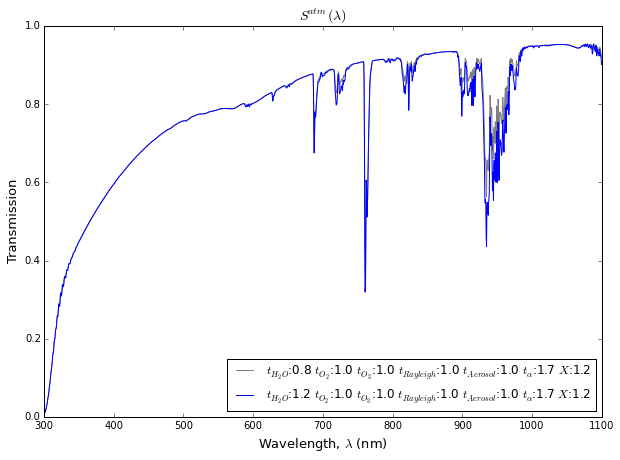

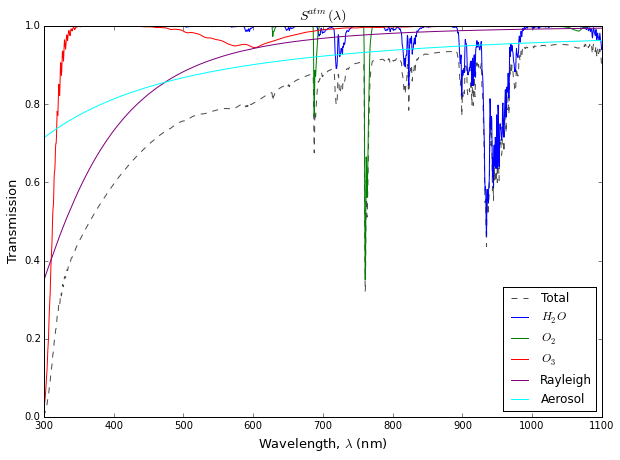

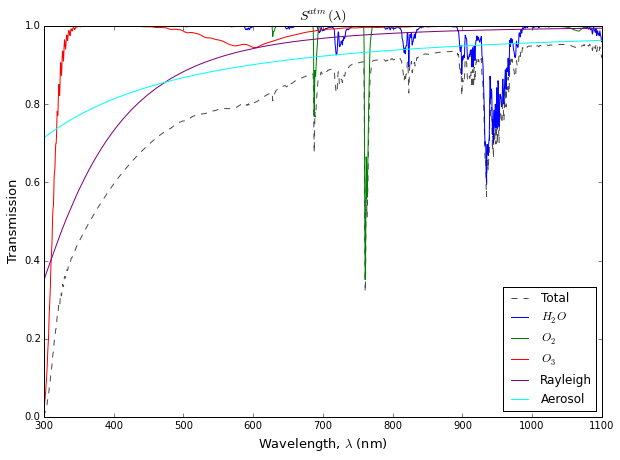

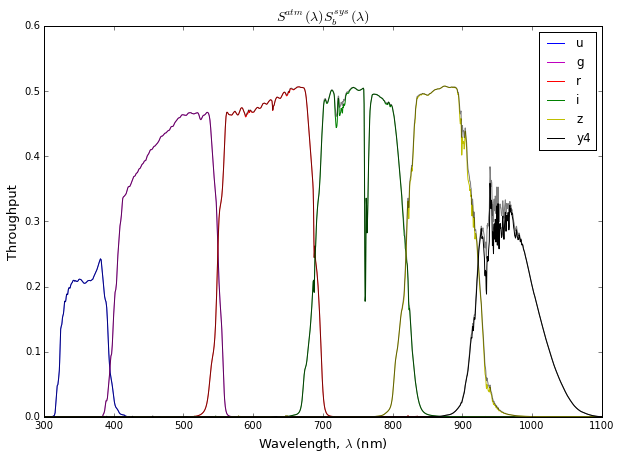

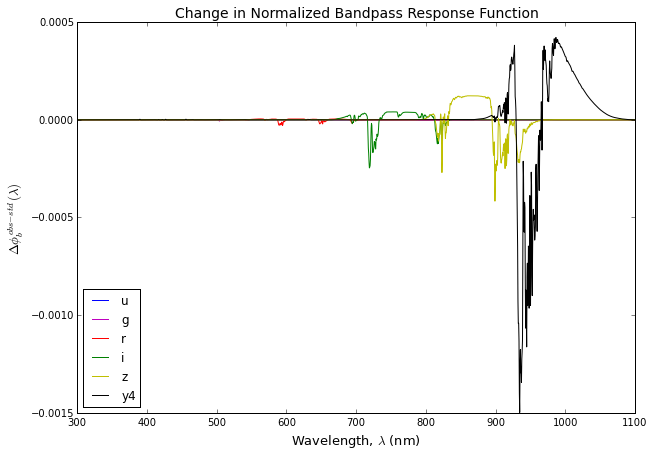

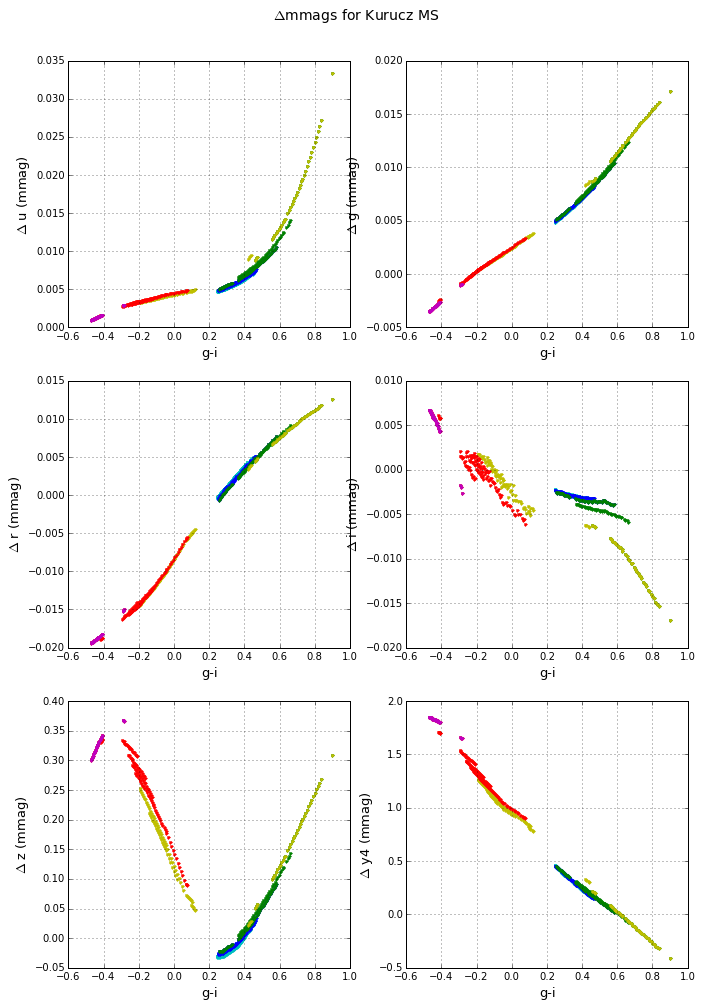

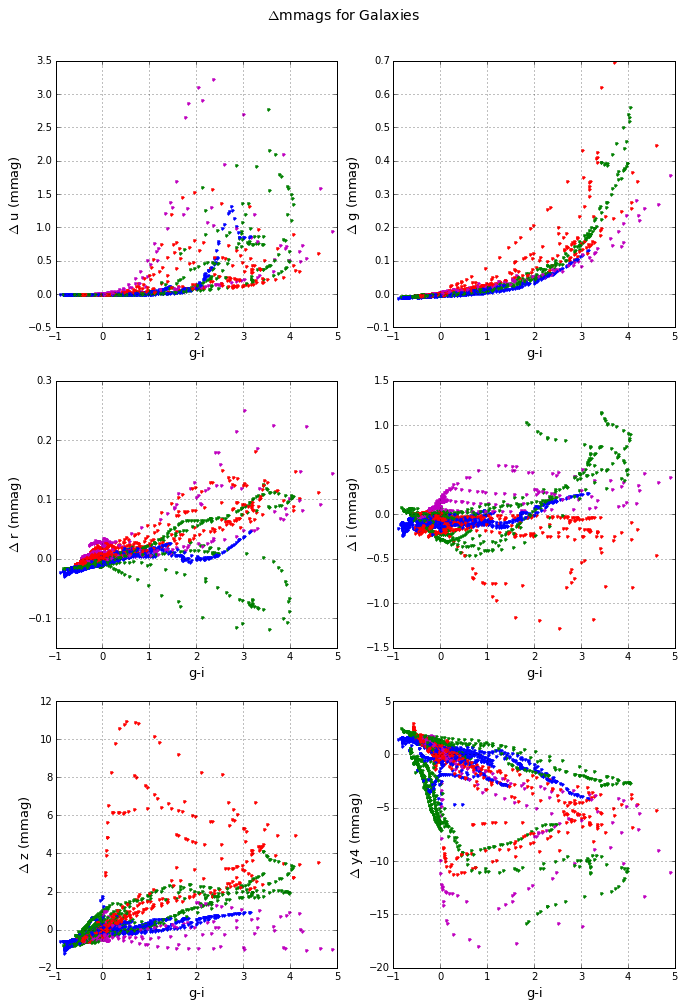

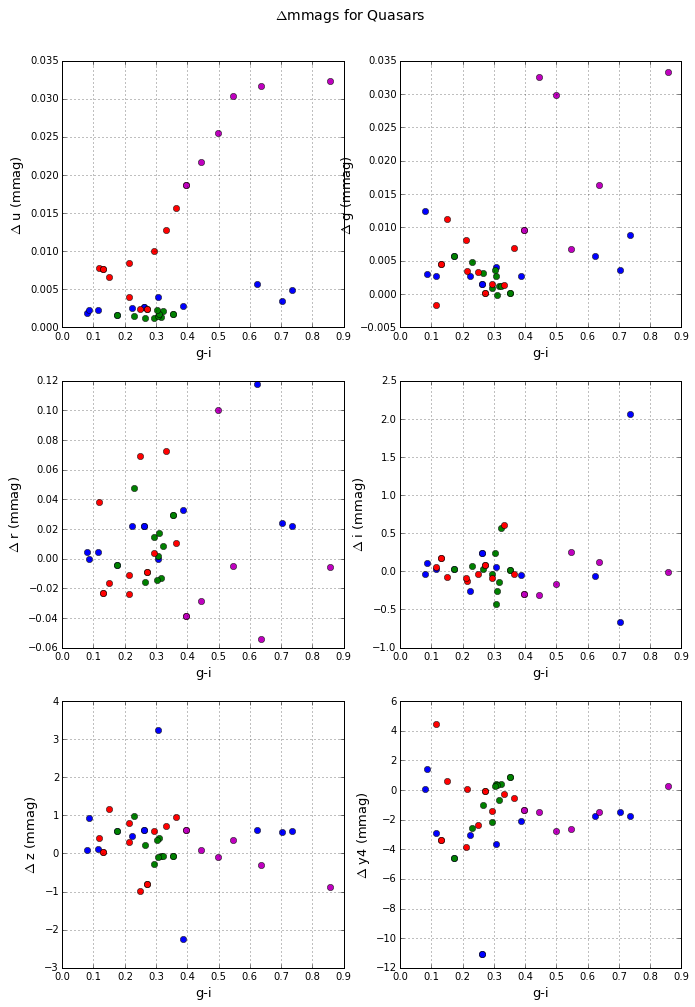

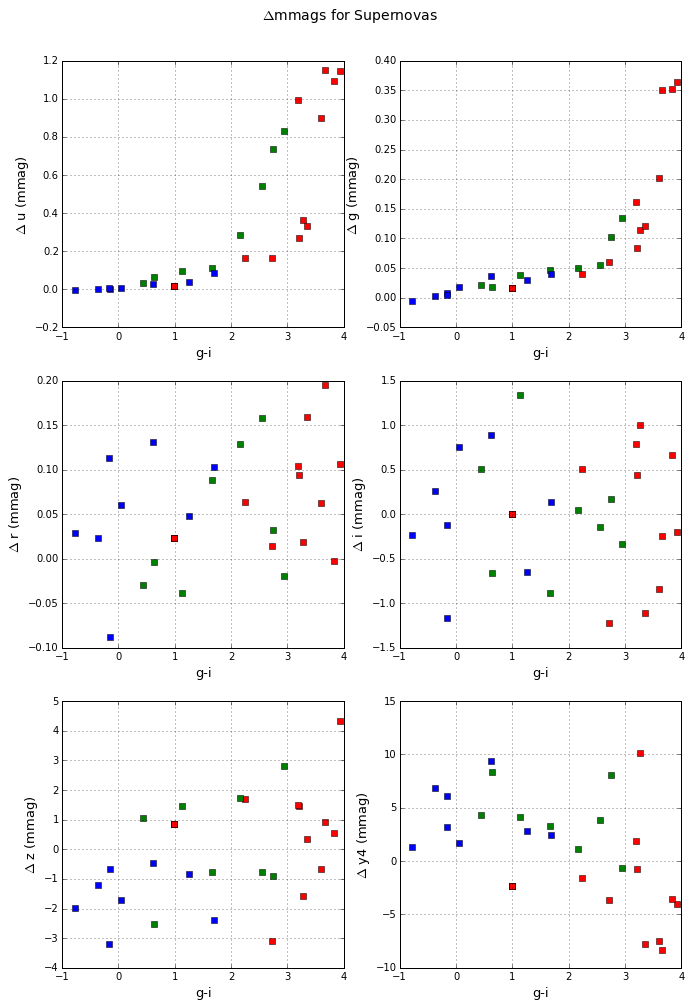

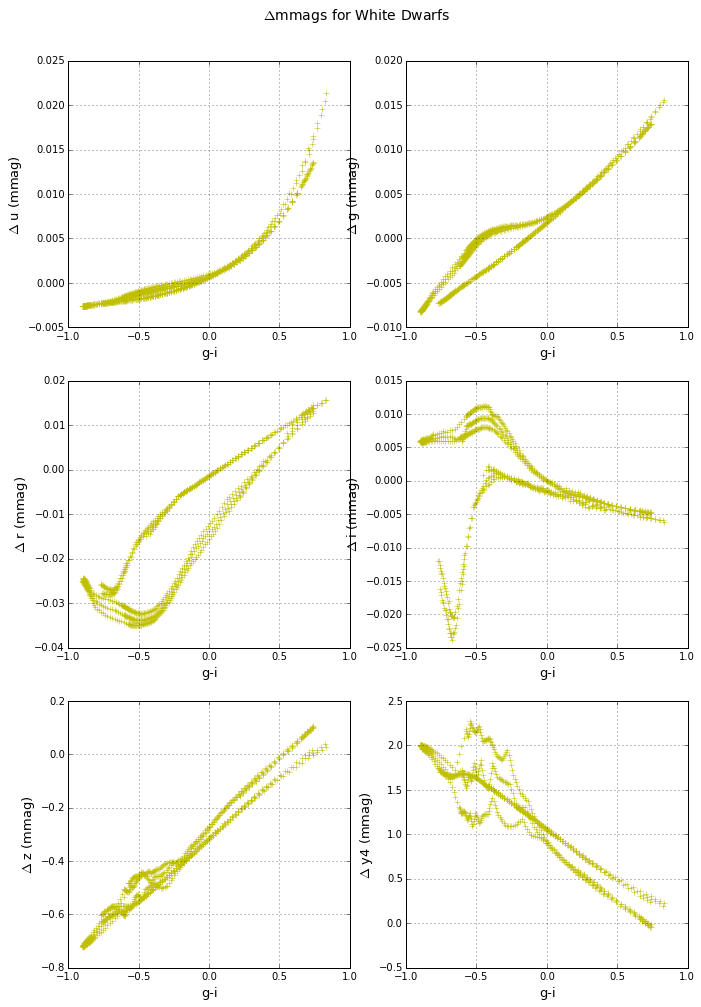

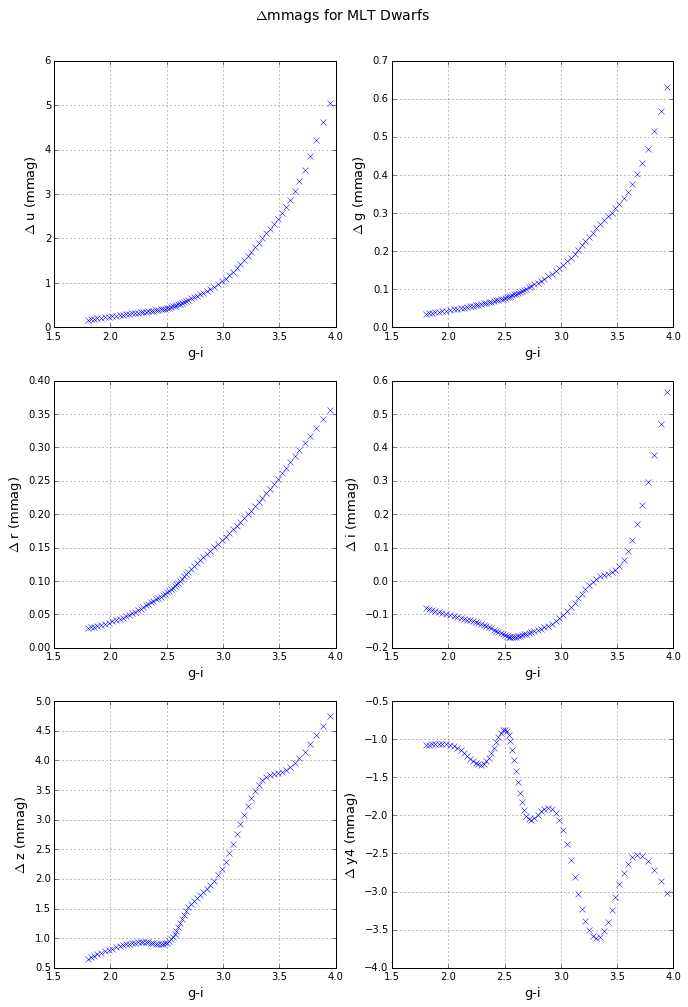

In [5]:
componentLimitPlot('H2O')

### $O_2$

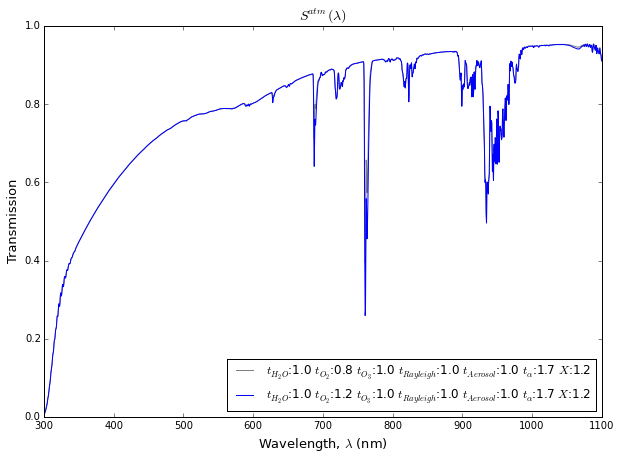

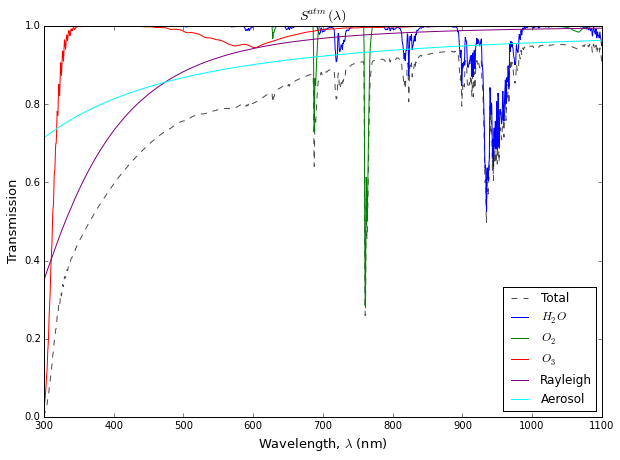

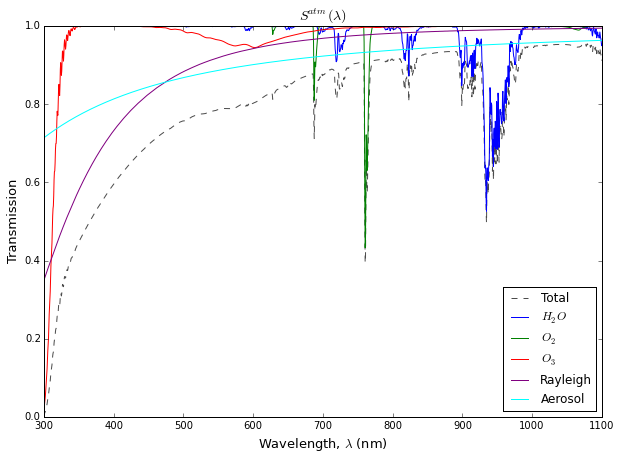

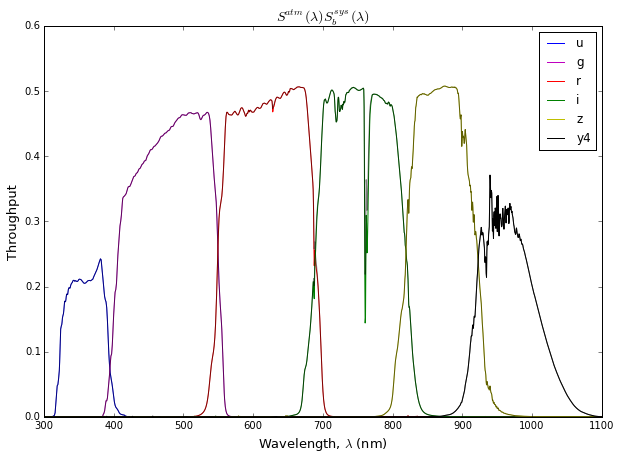

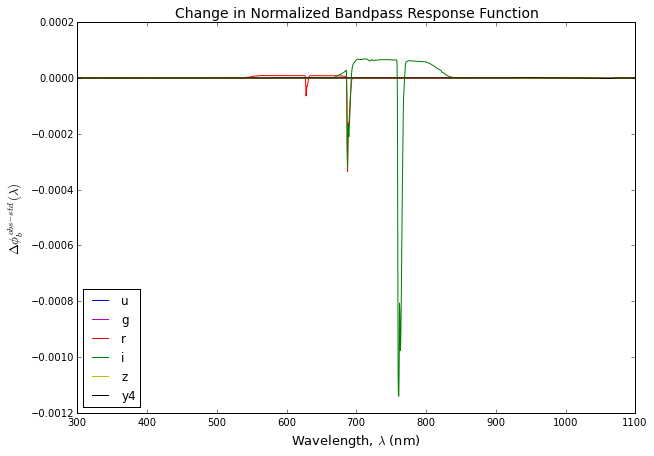

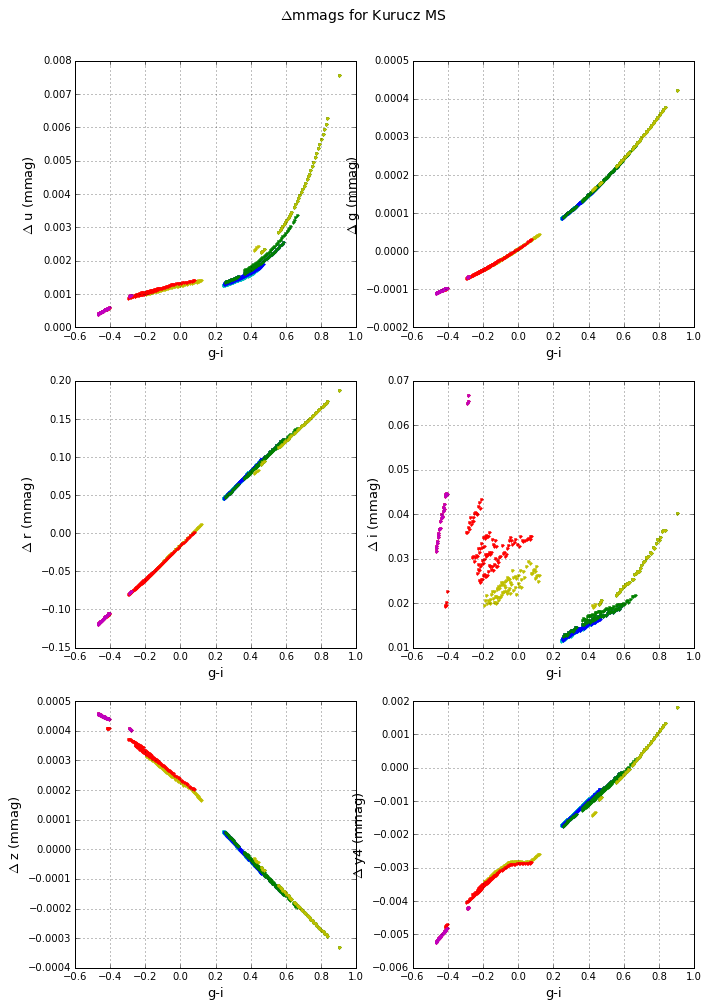

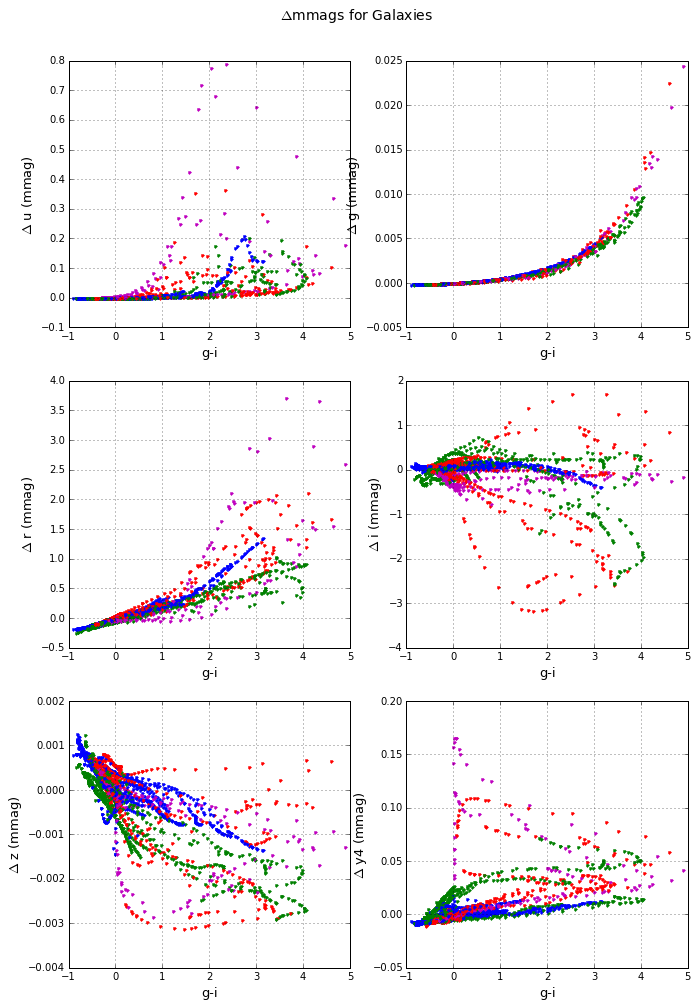

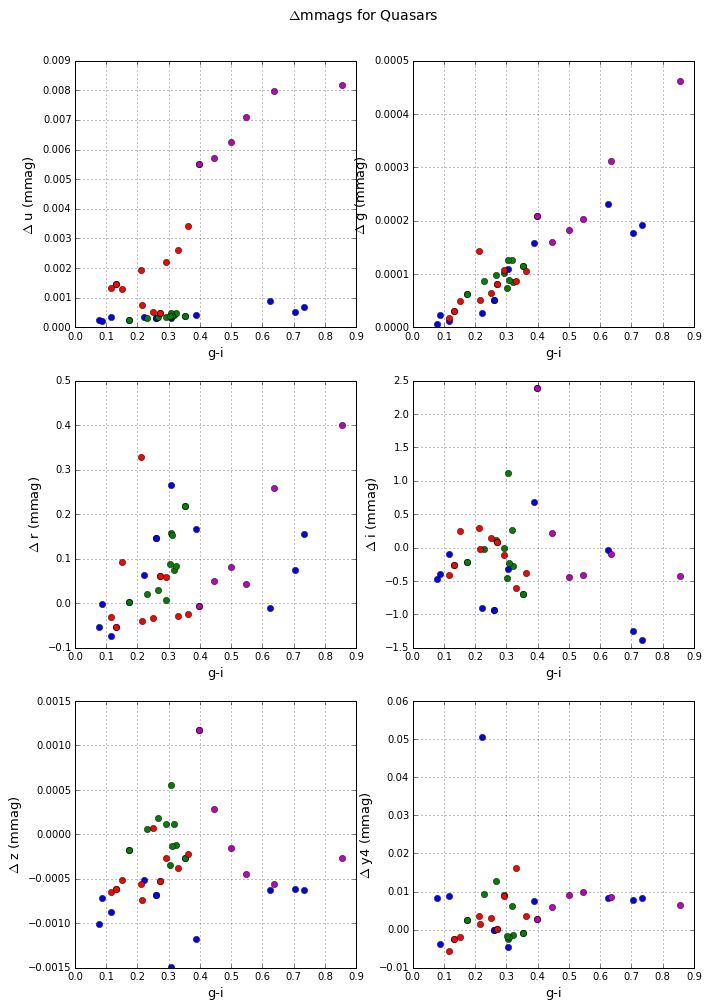

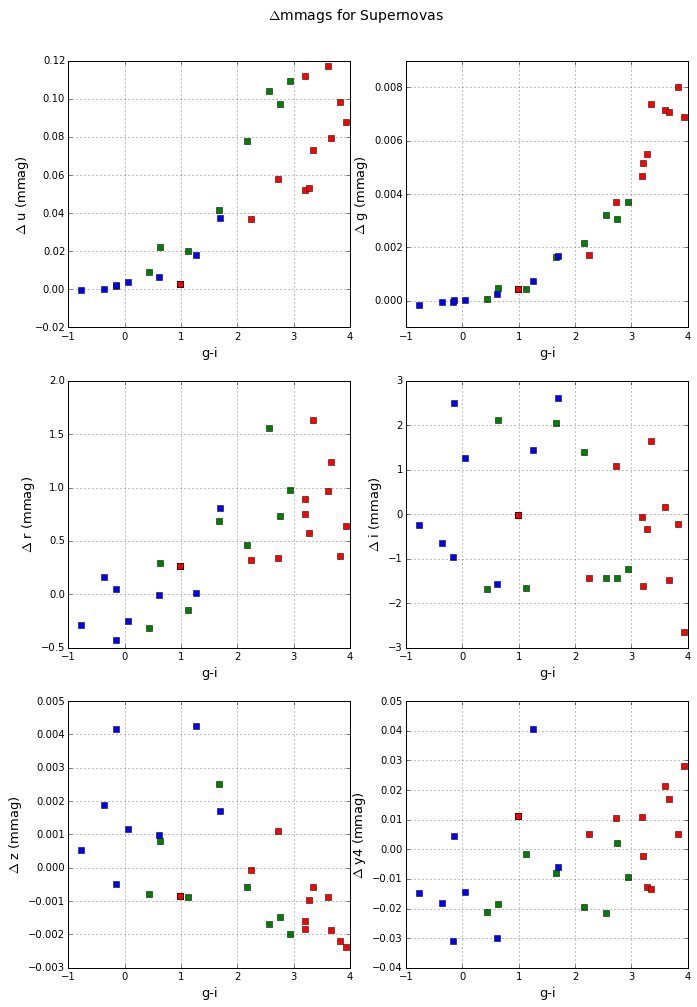

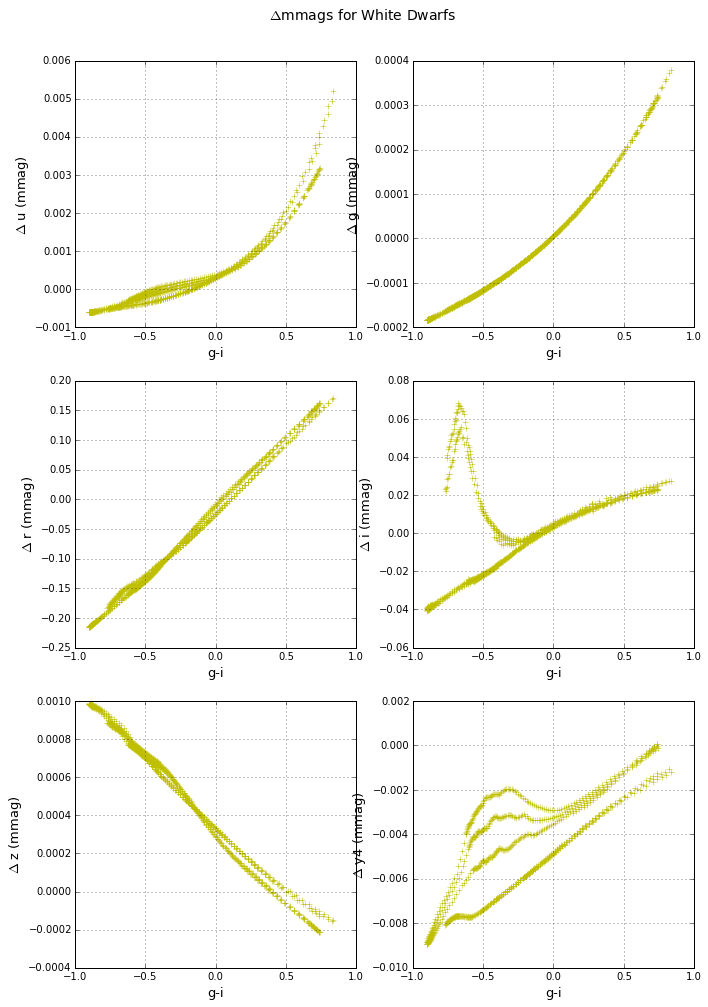

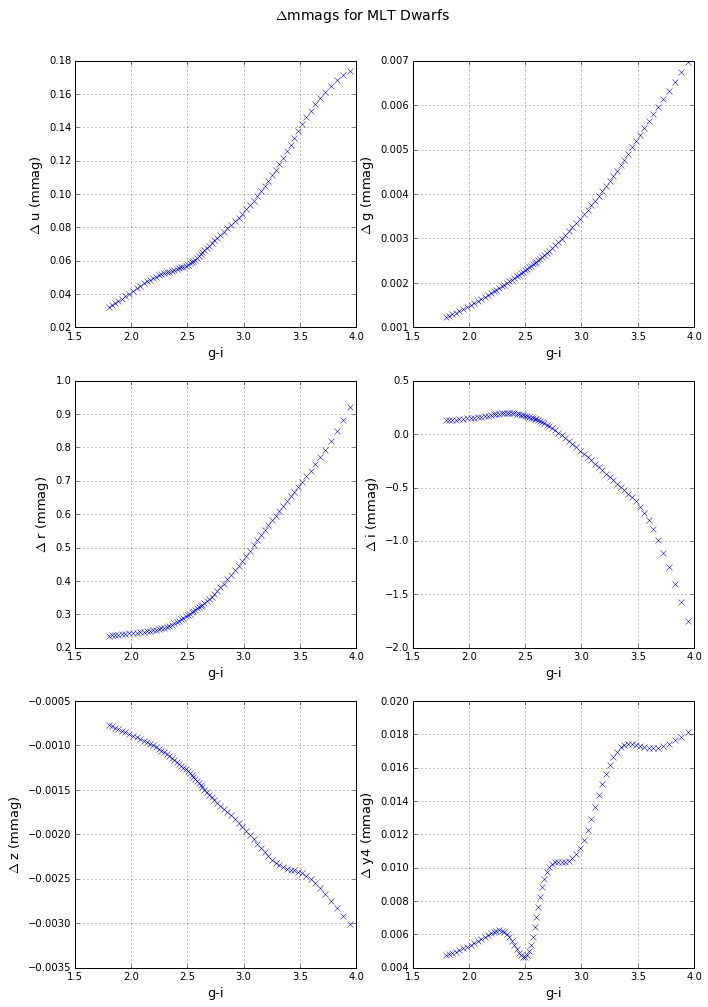

In [6]:
componentLimitPlot('O2')

### $O_3$

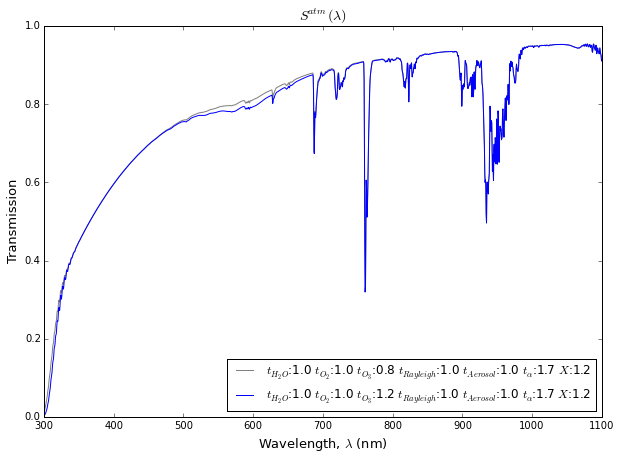

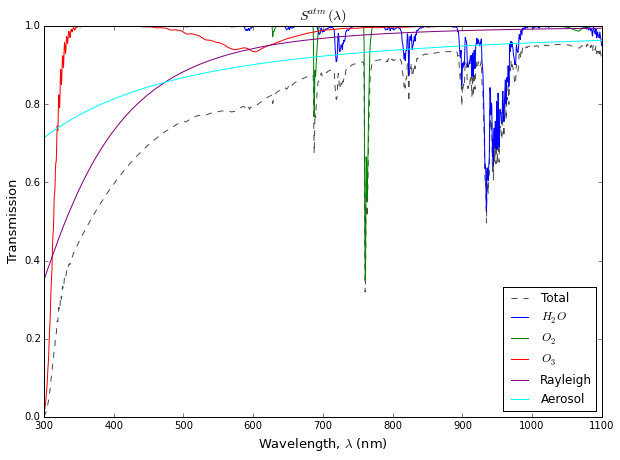

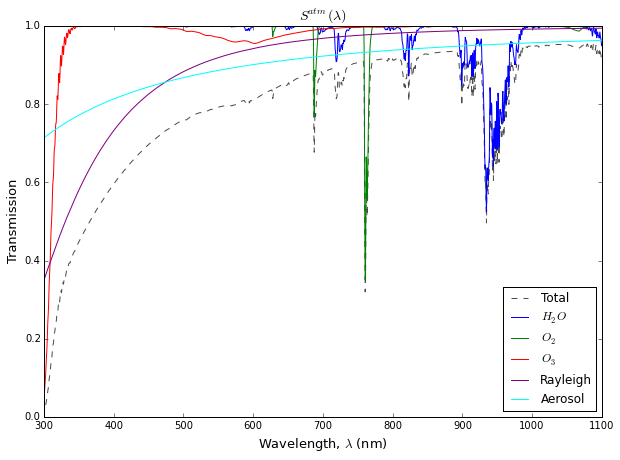

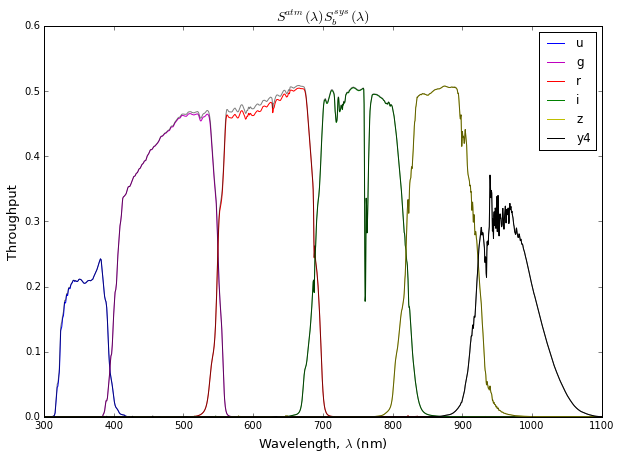

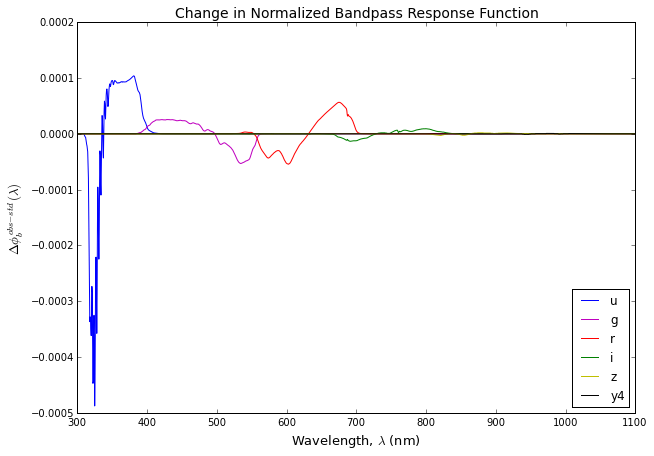

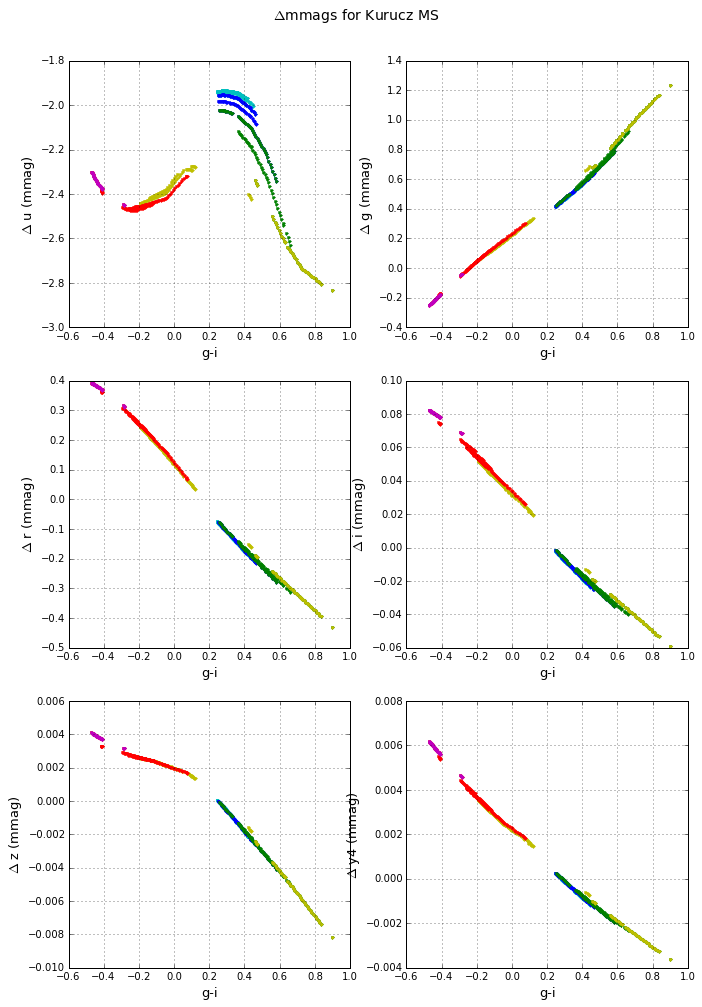

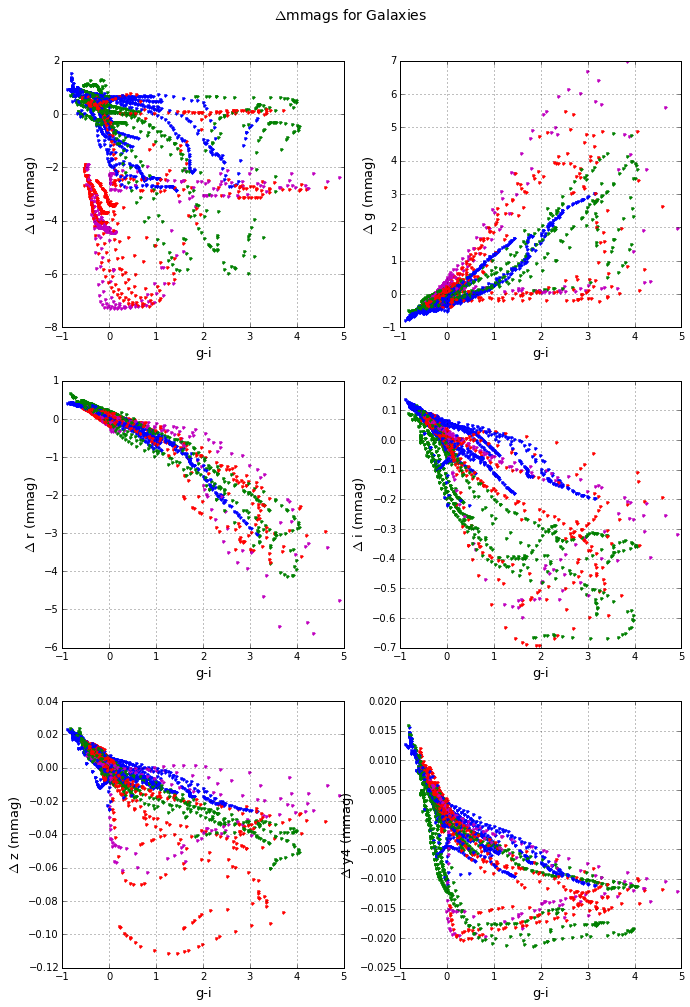

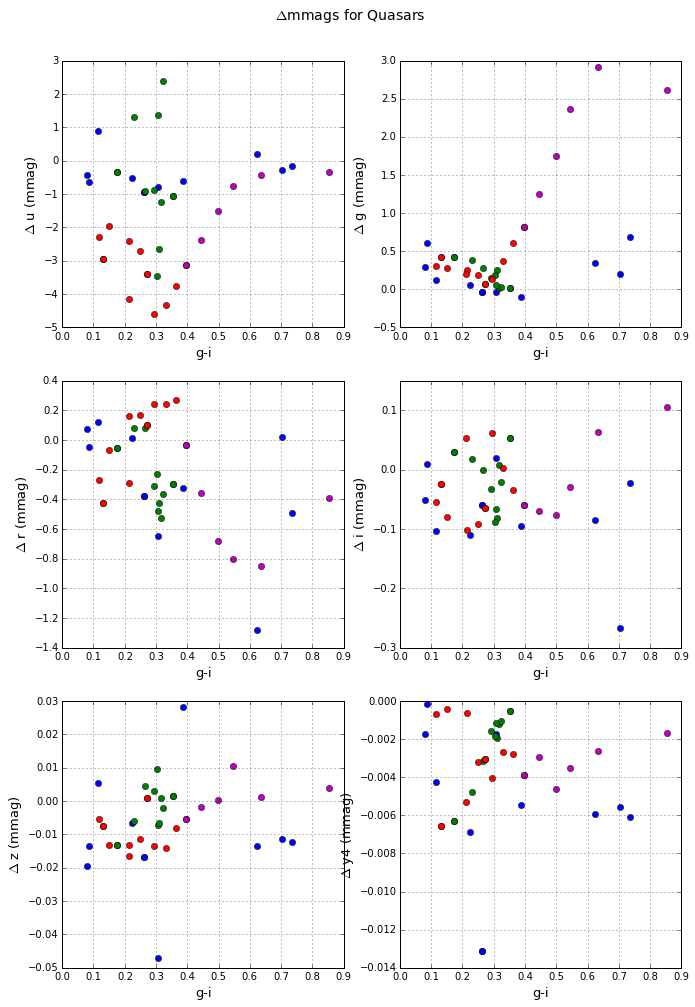

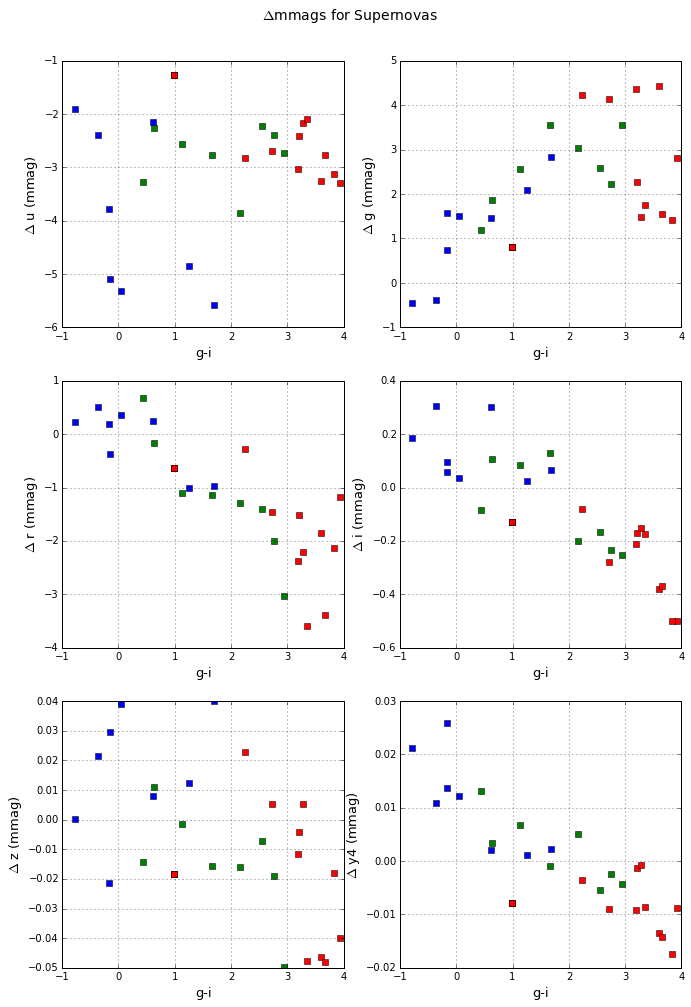

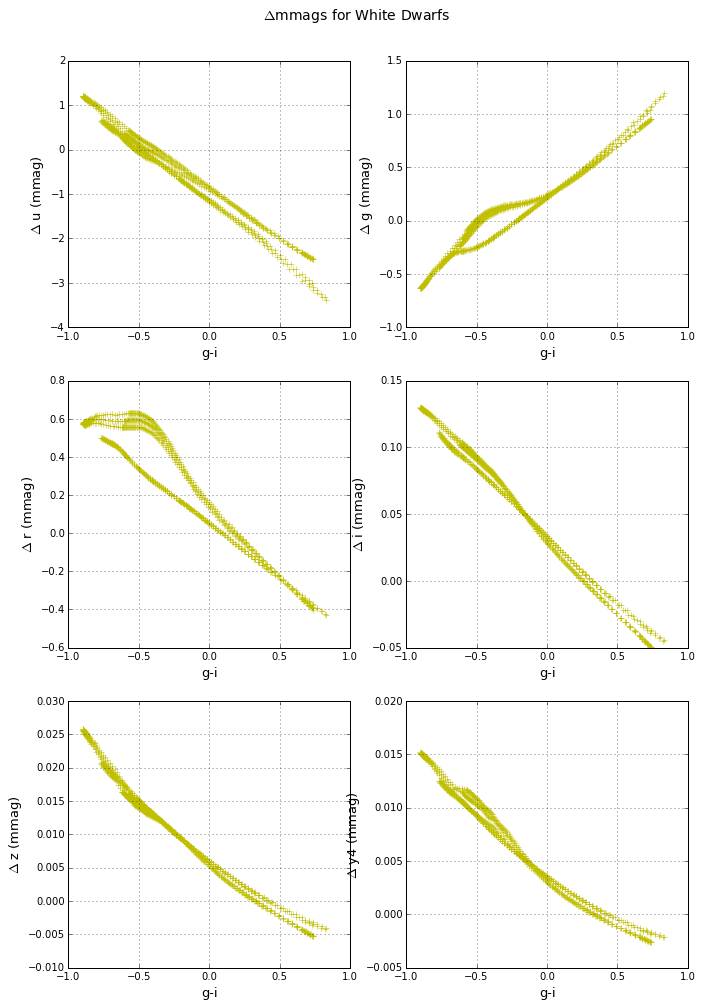

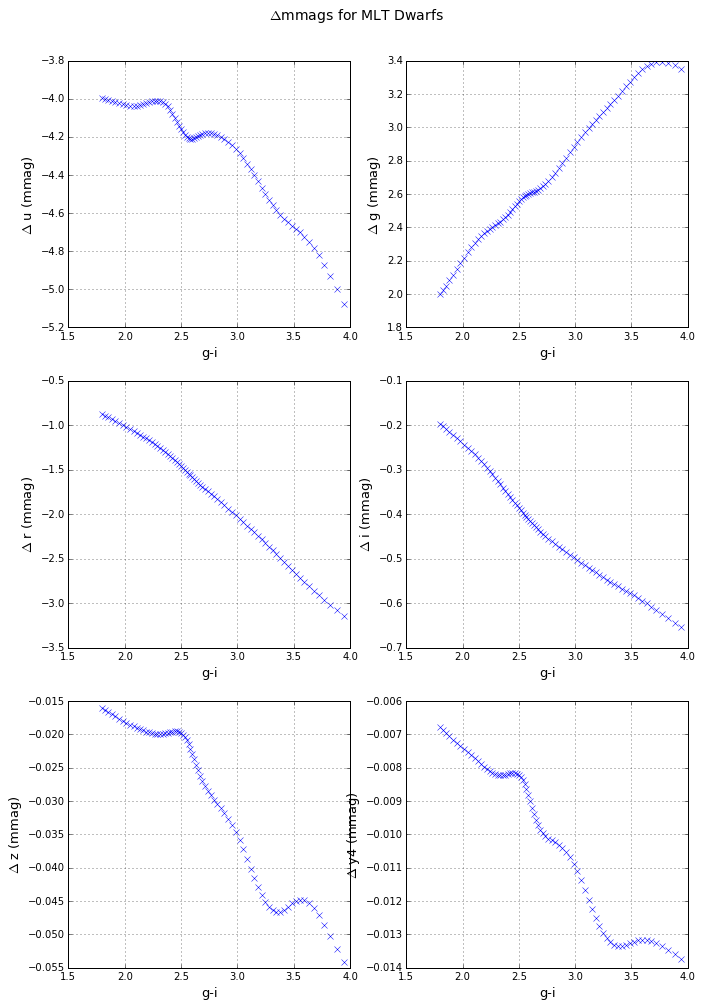

In [7]:
componentLimitPlot('O3')

### Rayleigh

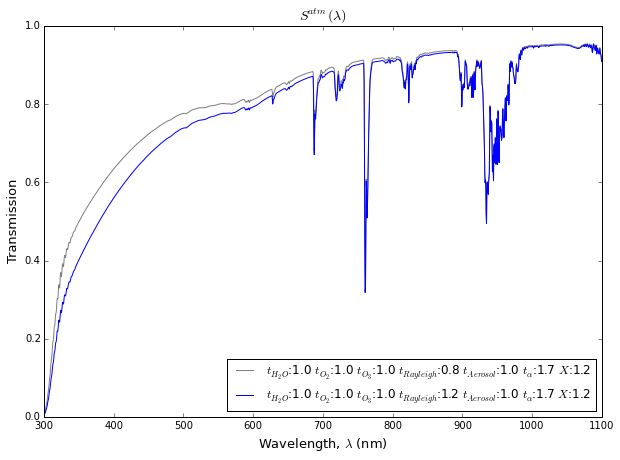

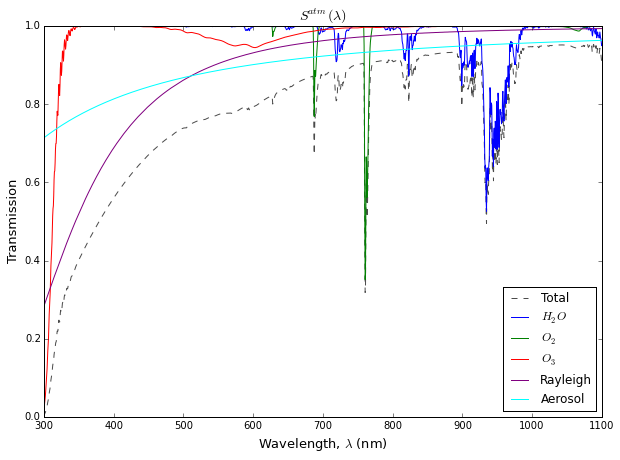

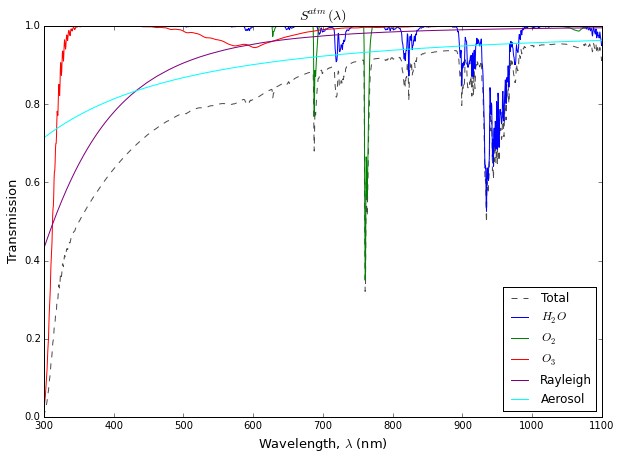

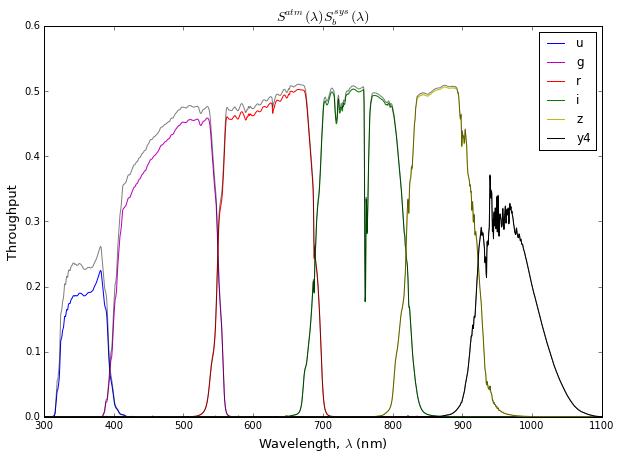

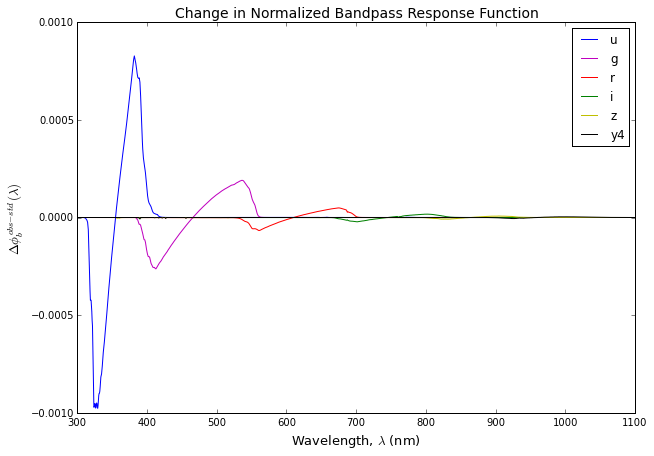

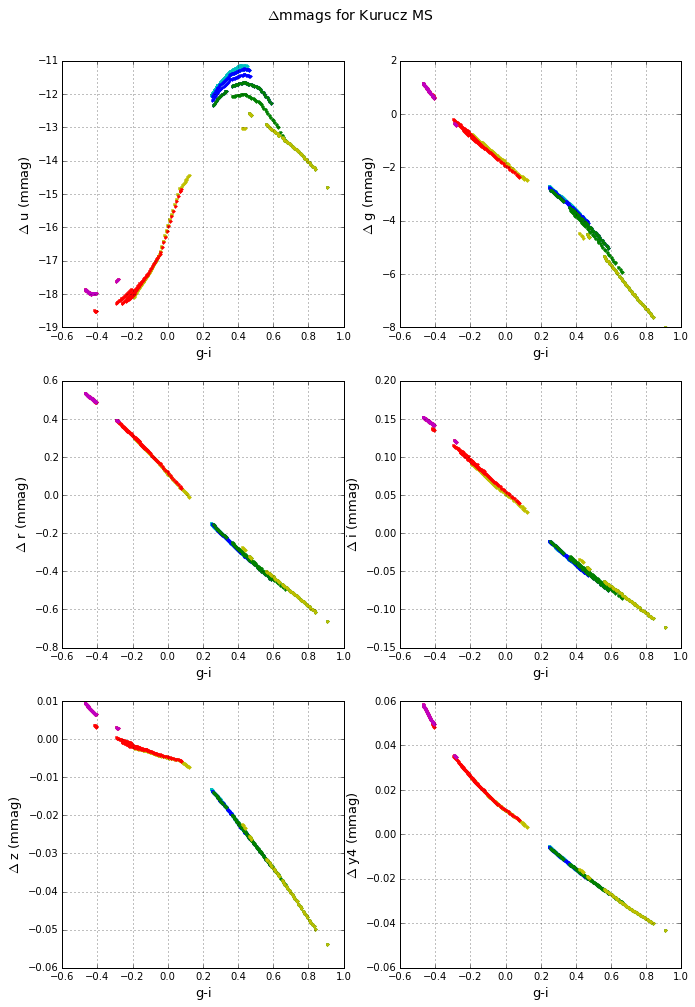

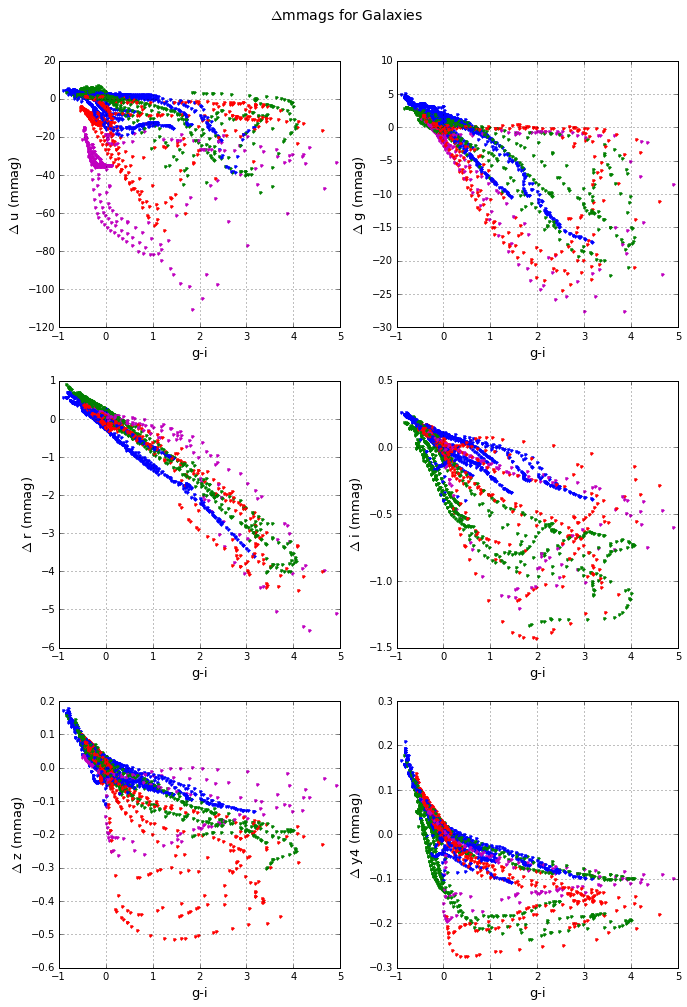

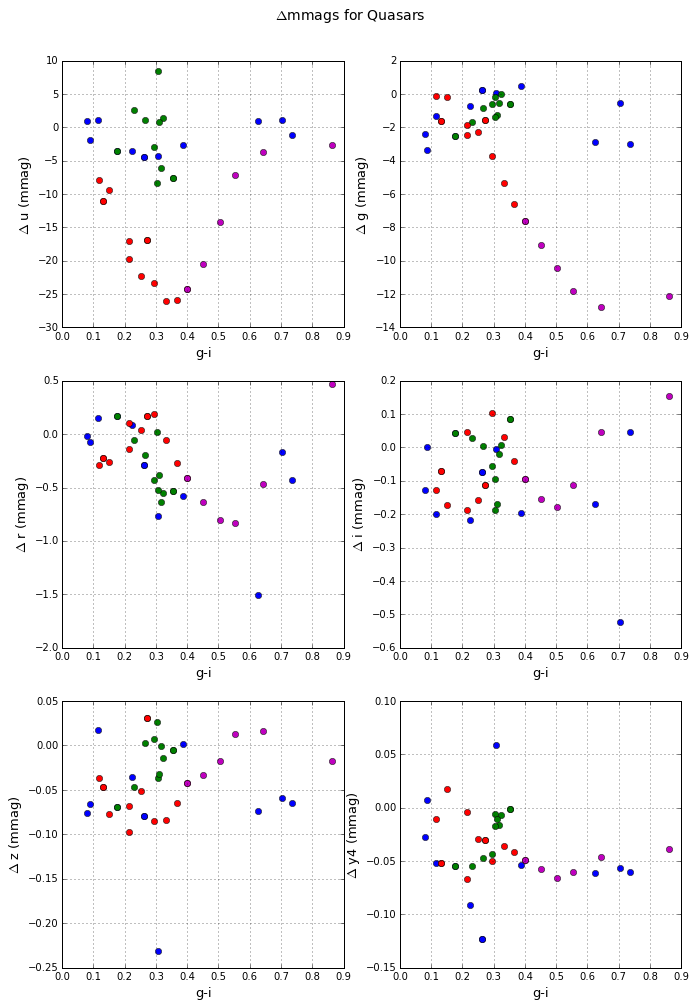

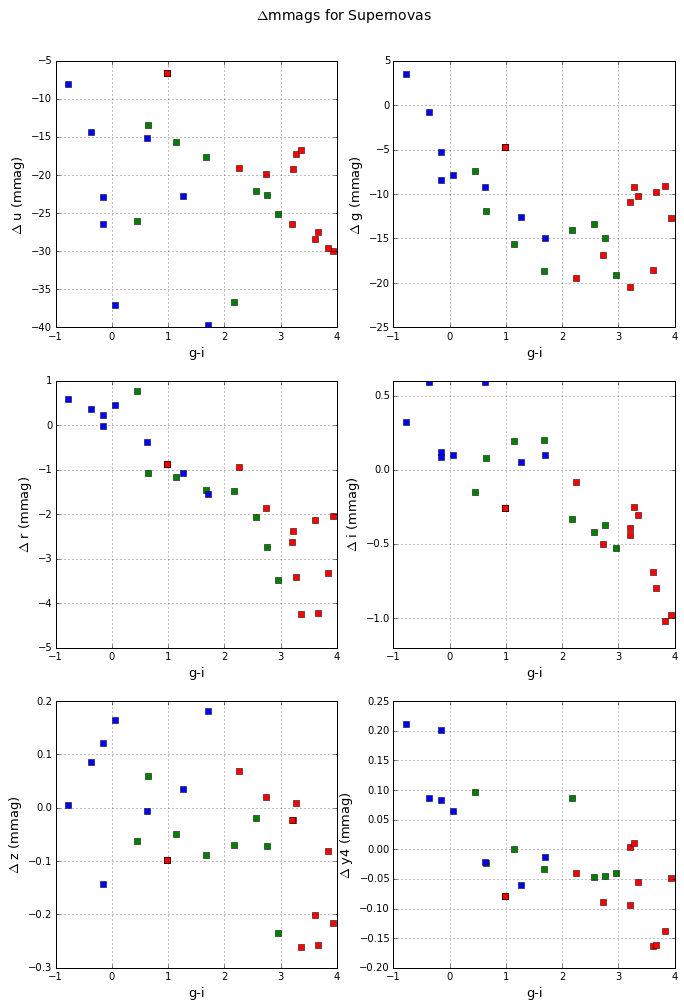

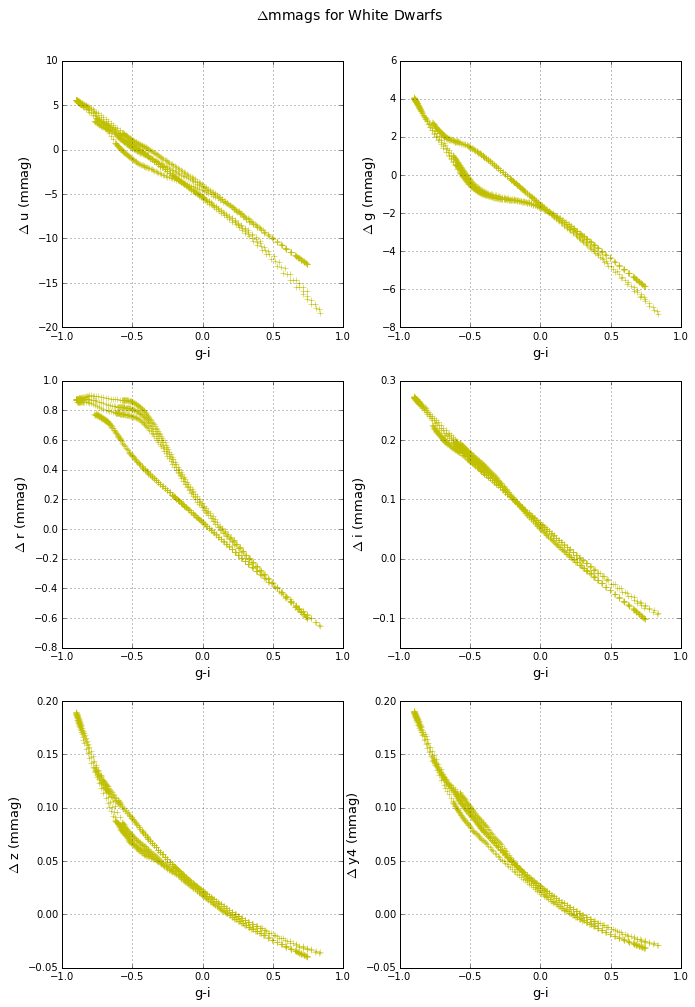

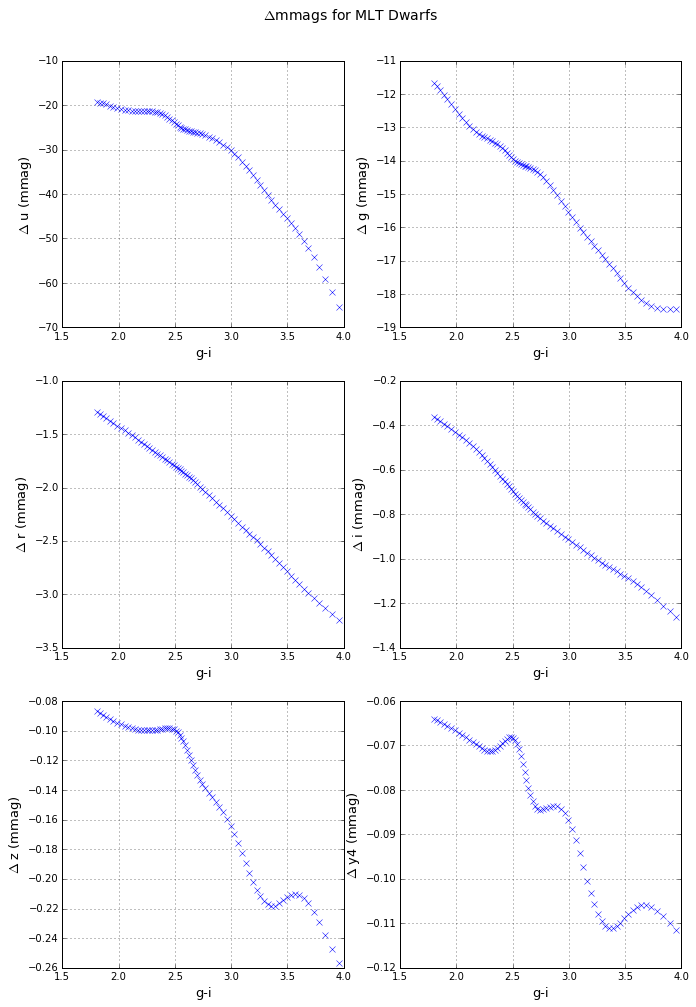

In [8]:
componentLimitPlot('Rayleigh')

### Aerosol

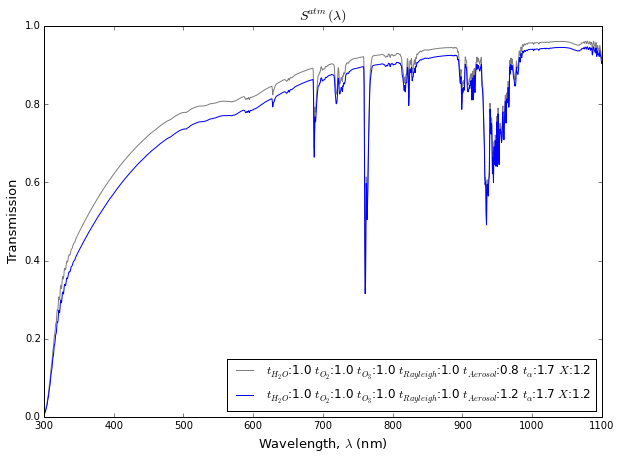

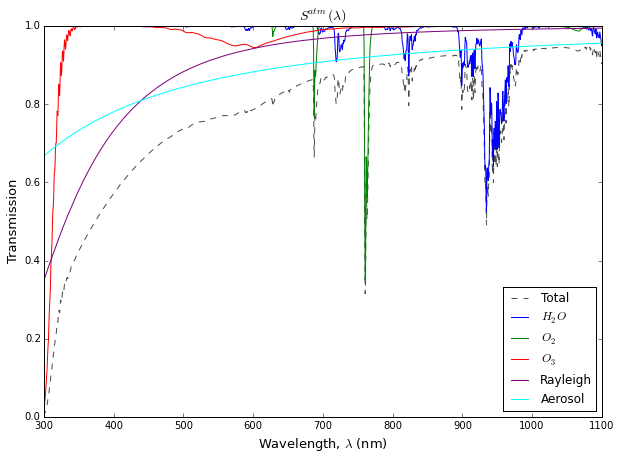

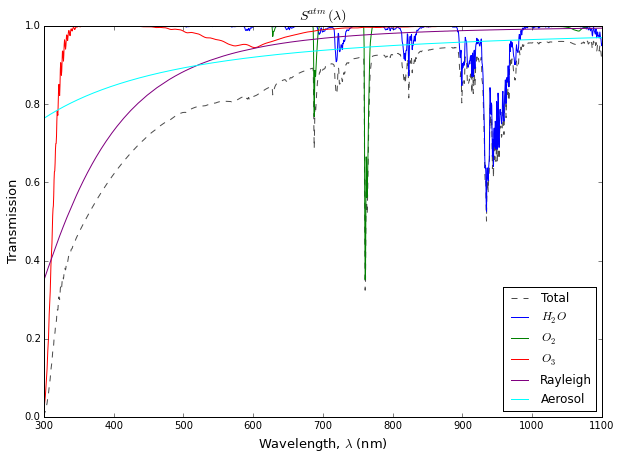

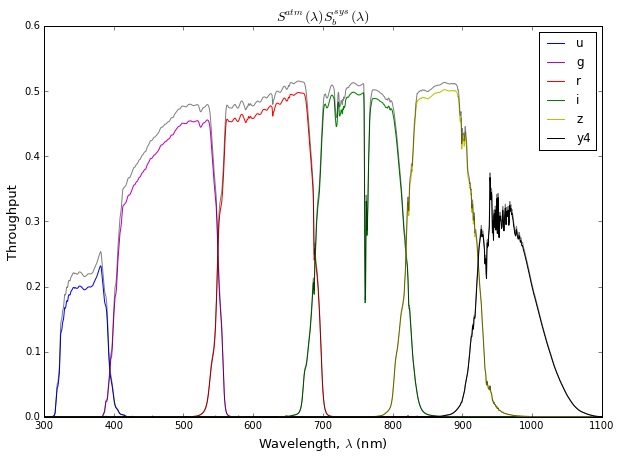

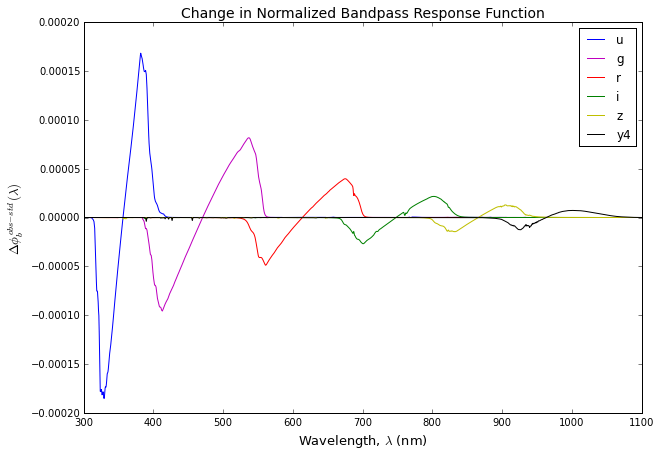

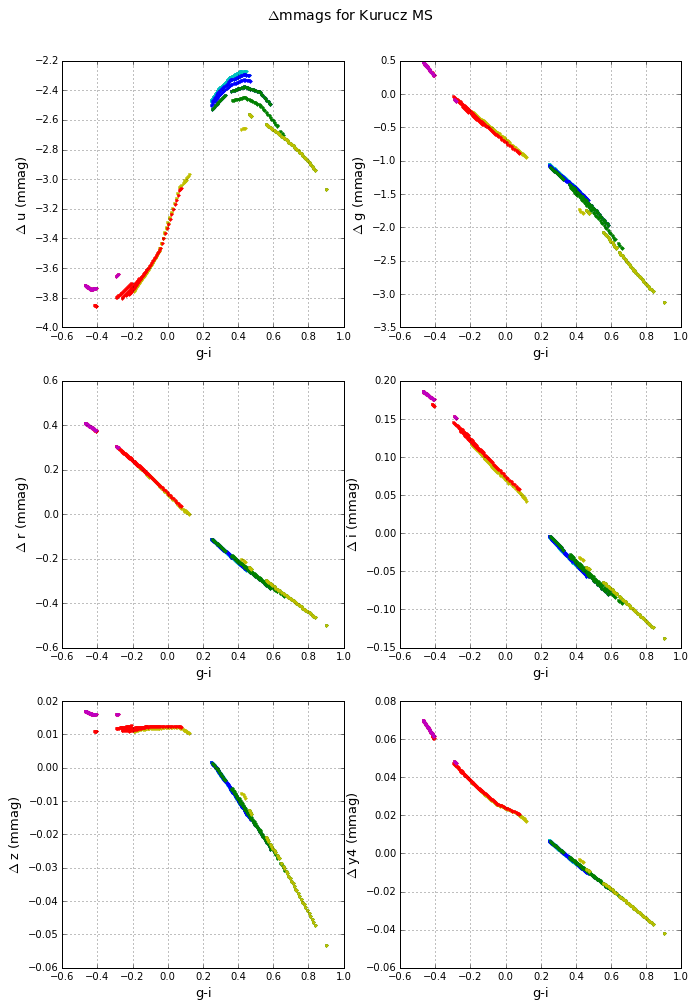

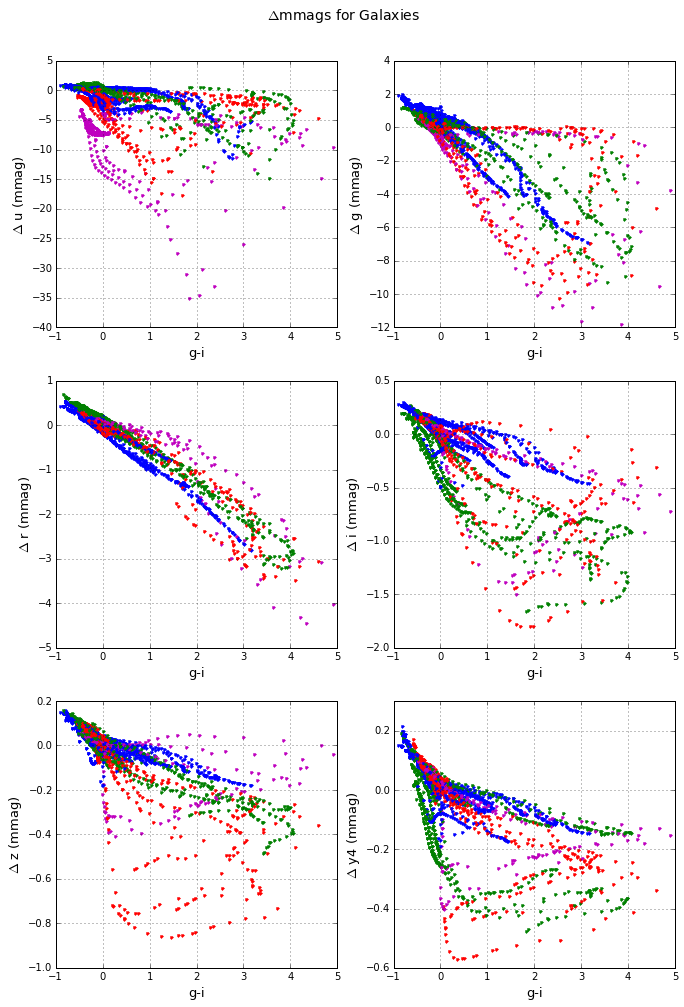

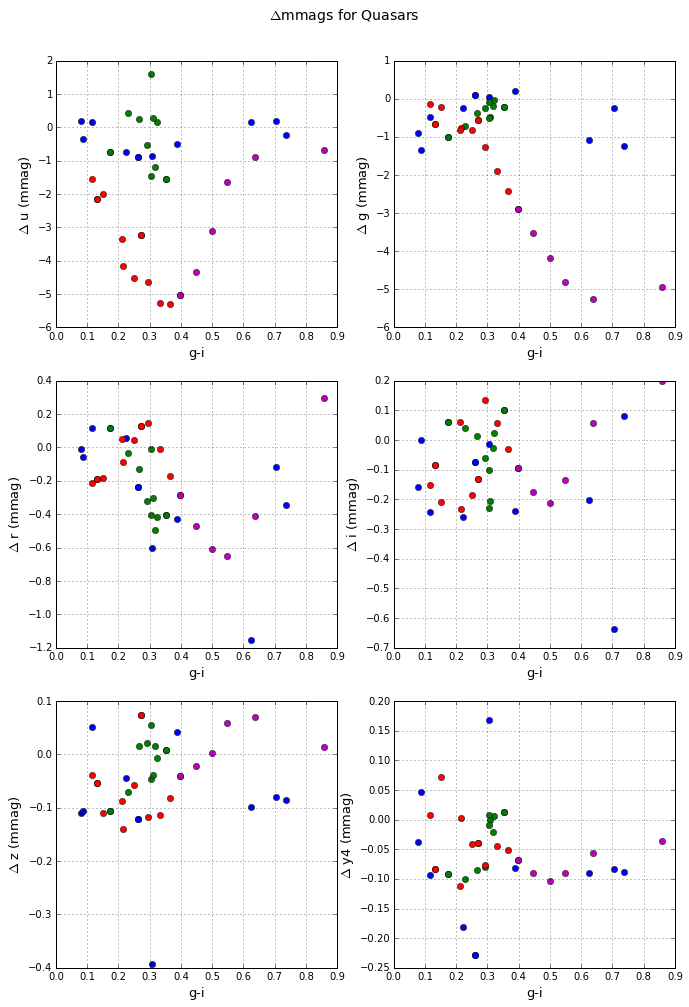

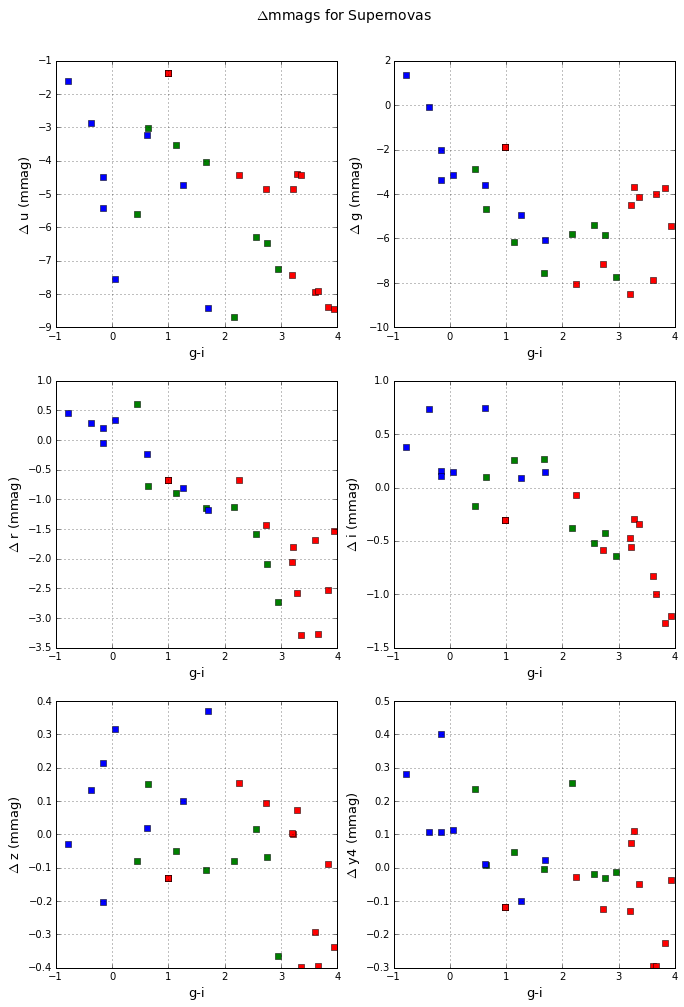

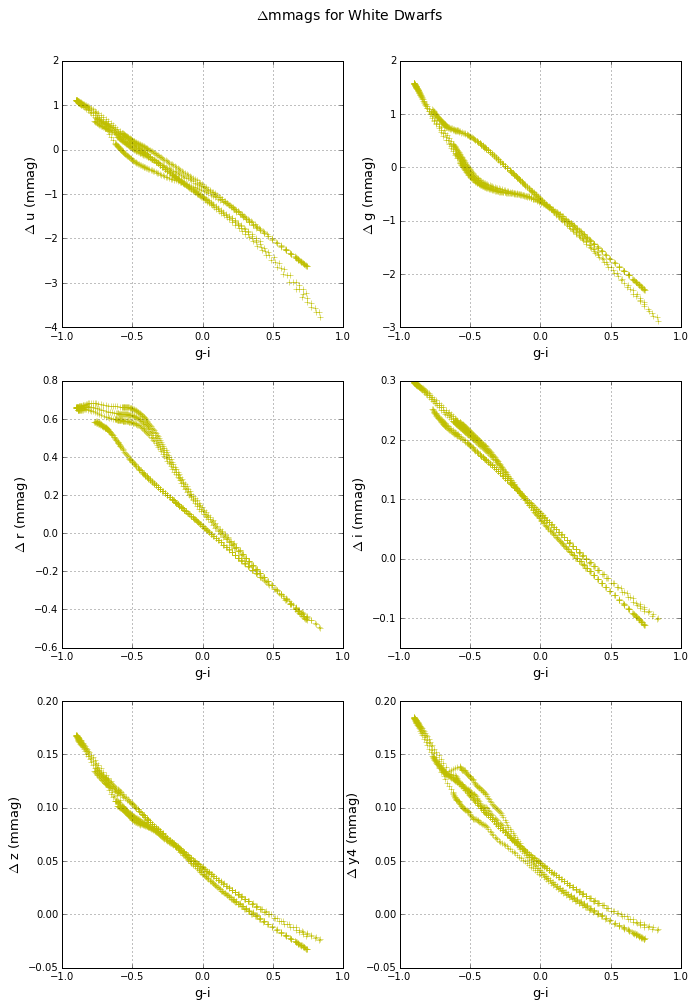

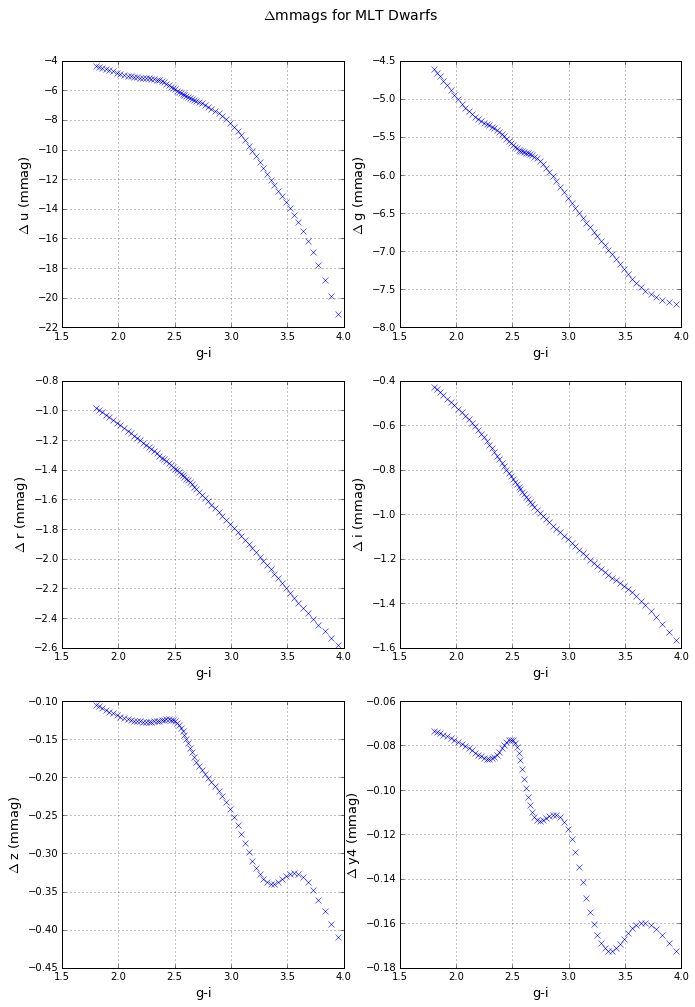

In [9]:
componentLimitPlot('Aerosol')

### Alpha

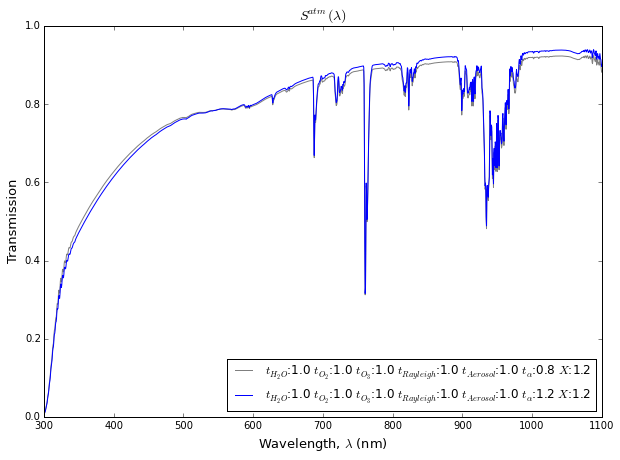

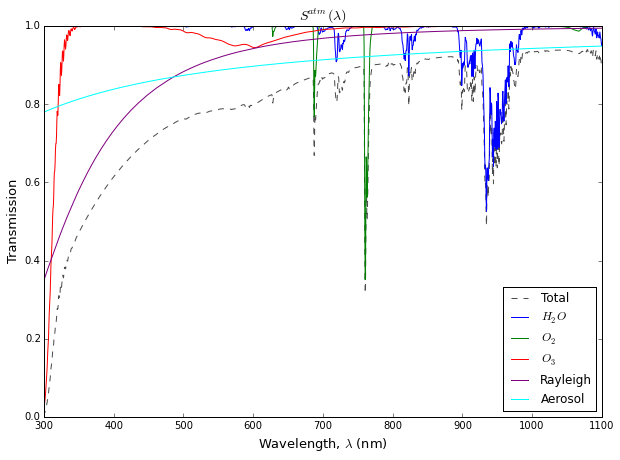

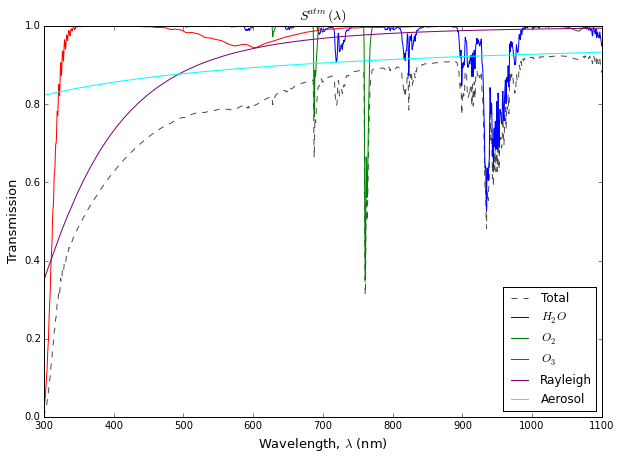

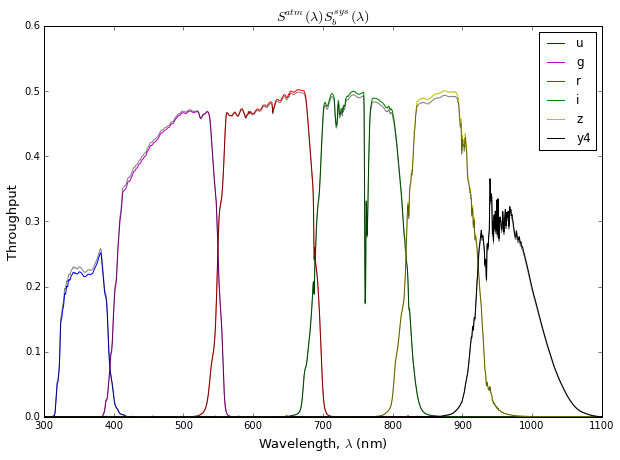

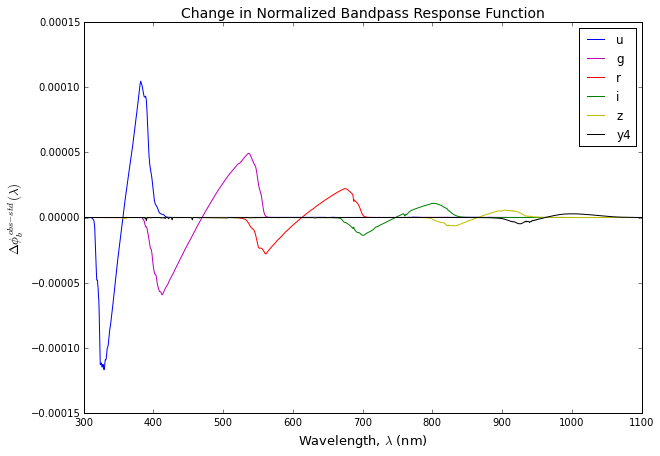

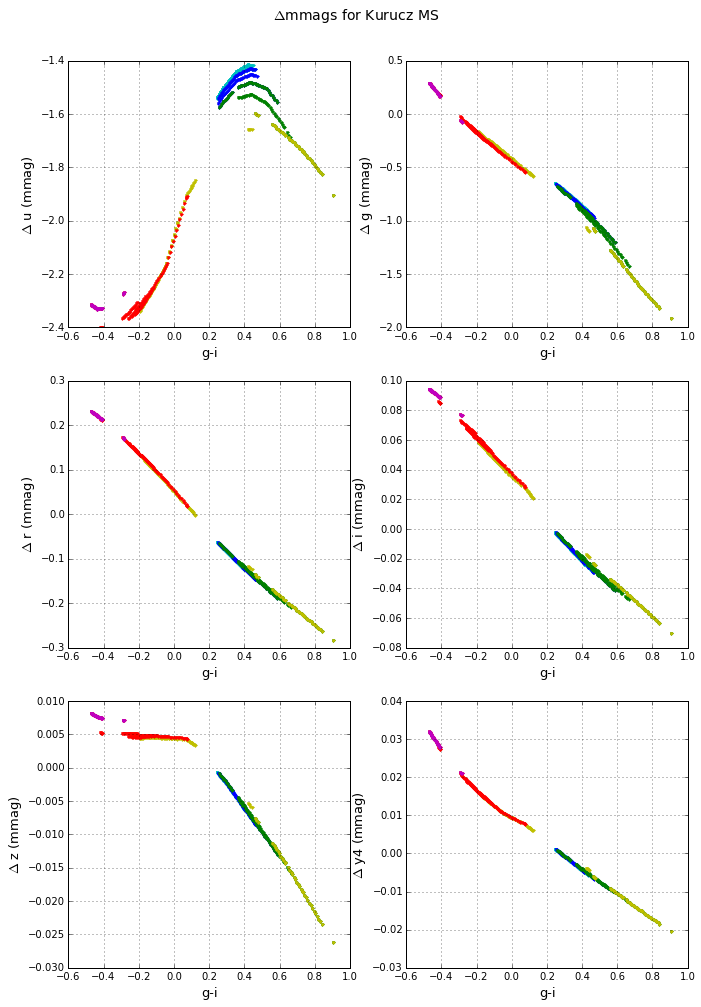

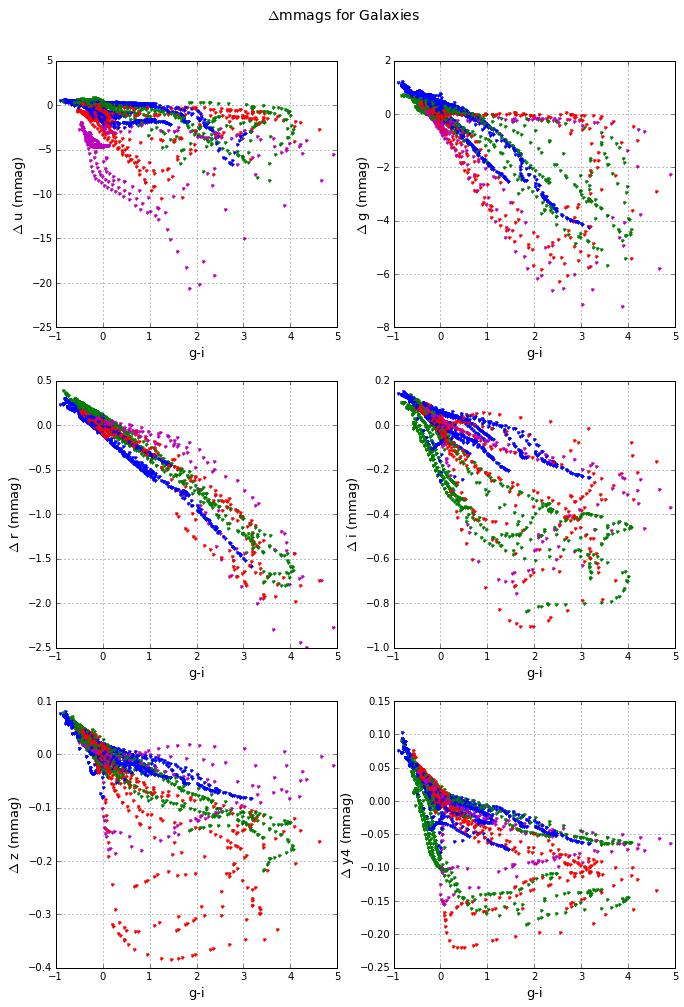

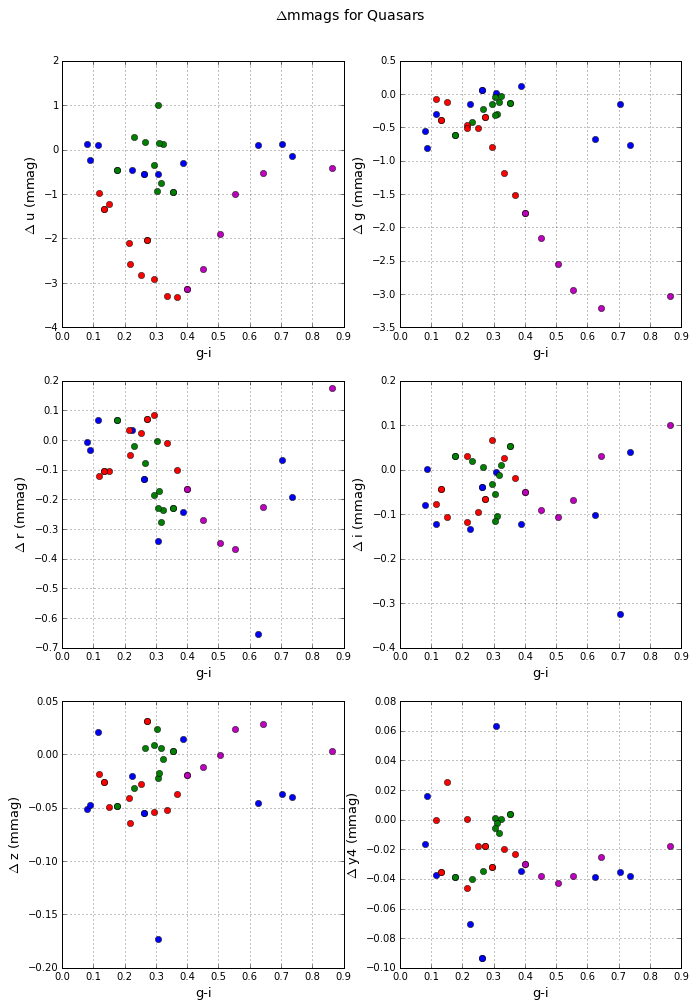

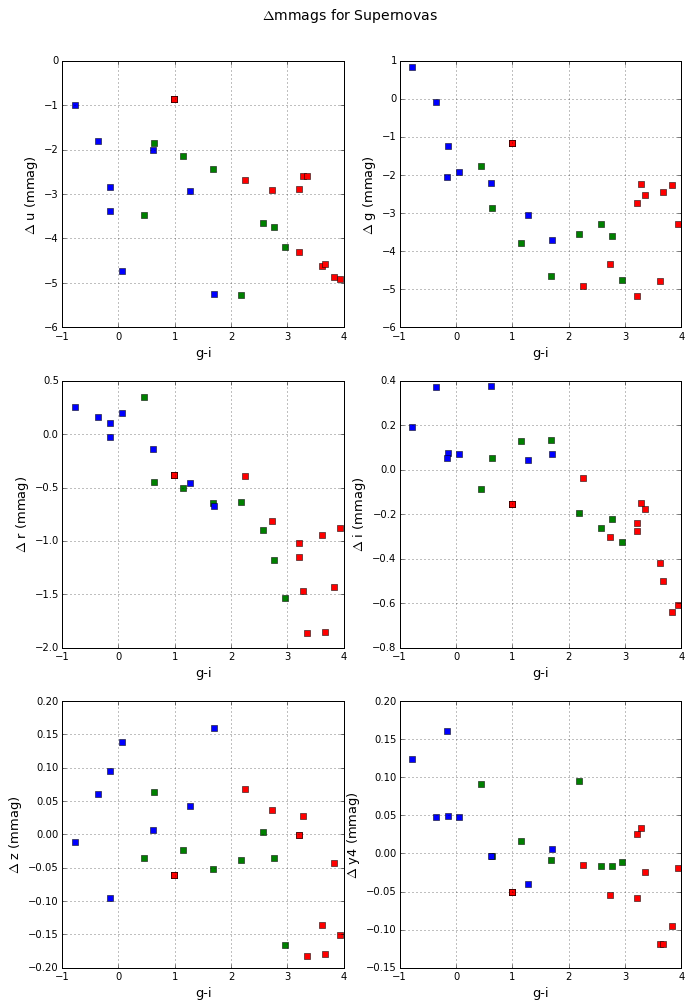

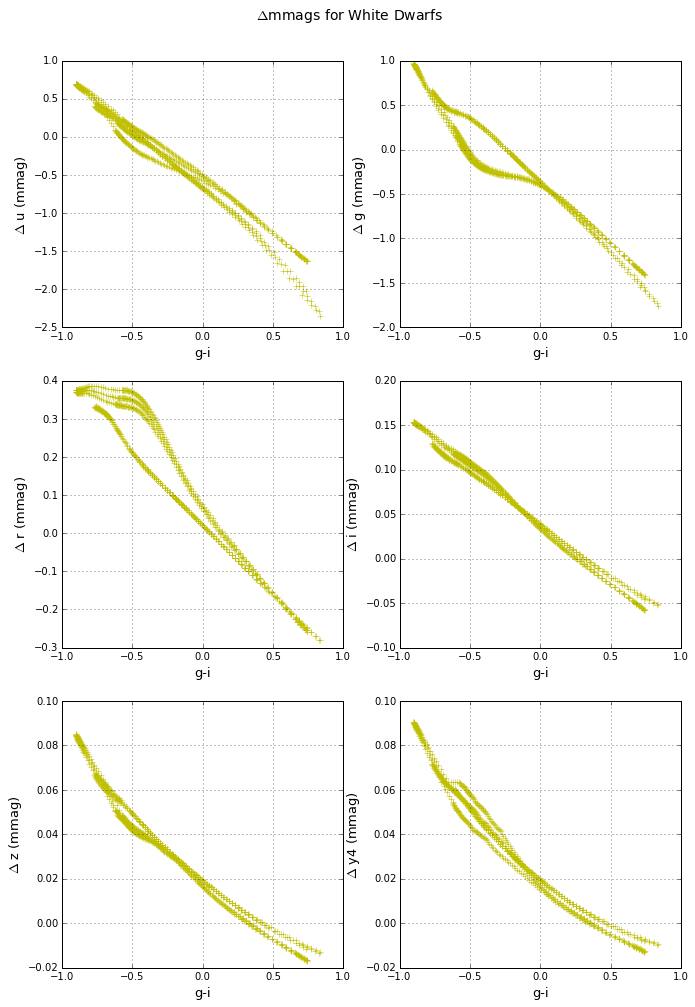

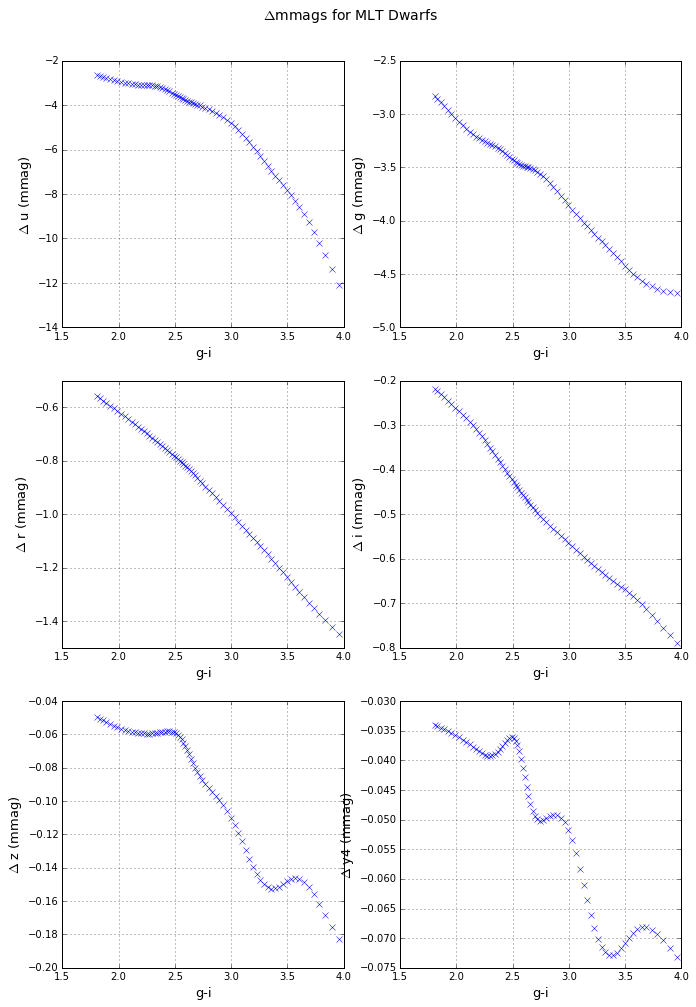

In [10]:
componentLimitPlot('Alpha')